## La Liga Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
train=pd.read_csv("datasets/laliga_data_train_onehot.csv")
test=pd.read_csv("datasets/laliga_data_test_onehot.csv")
# print(train.head())
# print(train.shape)

In [3]:
X_train = train.drop(columns = ['FTR'])
y_train = train['FTR']
print(X_train.shape)
print(y_train.shape)

(2660, 29)
(2660,)


In [4]:
X_test = test.drop(columns = ['FTR'])
y_test = test['FTR']
print(X_test.shape)
print(y_test.shape)

(380, 29)
(380,)


In [5]:
columns = X_train.shape[1]
columns

29

In [6]:
# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
def fit_model(learning_rate, hidden_layer, dropout, batch_size):
    x = Input(shape=(columns,))
    # h = Conv2D(32, (7, 7), strides=(2, 2))(x)
    # h = Activation('relu')(x)
    h = Flatten()(x)
    for i in hidden_layer:
        h = Dense(i, activation = 'relu')(h)
    # for i in range(10):
    #     h = Dense(75)(h)
    h = Dropout(dropout)(h)
    p = Activation('softmax')(h)

    # Now that we have defined how to find p from x, we can create a 
    # model simply by saying what is input and what is output
    model = Model(inputs=x, outputs=p)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])
    model.summary()
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=200, validation_split=0.04)
    return history,model

In [7]:
#hyperparam tuning
#learning_rate
# learning_rates = [1e-5,1e-6,1e-7]
learning_rates = [1e-5,1e-6]
#hidden_layers
# hidden_layers = [[41,75],[41,10],[41,10,10,10]]
hidden_layers = [[41,75,3],[41,10,10,10,3]]
#dropout
dropouts = [0,.3,.5,.7]
# dropouts = [.3,.5]
#batch_size
# batch_sizes = [8,16,32,64]
batch_sizes = [16,32]
#result
result = {}
best_history = None
best_val_accuracy = 0
best_model = None

for lr in learning_rates:
    for hl in hidden_layers:
        hl_str = '-'.join(map(str, hl))+'-3'
        for dp in dropouts:
            for bs in batch_sizes:
                history, model = fit_model(lr, hl, dp, bs)
                tmp = {}
                tmp['loss'] = history.history['loss'][-1]
                tmp['accuracy'] = history.history['accuracy'][-1]
                tmp['val_loss'] = history.history['val_loss'][-1]
                tmp['val_accuracy'] = history.history['val_accuracy'][-1]
    #             print(history)
                result[(lr,hl_str,dp, bs)] = tmp
                print(tmp['val_accuracy'], tmp)
                if tmp['val_accuracy'] > best_val_accuracy:
                    best_val_accuracy = tmp['val_accuracy']
                    best_history = history
                    best_model = model
                
                
            

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten (Flatten)            (None, 29)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1230      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 228       
_________________________________________________________________
dropout (Dropout)            (None, 3)                 0         
_________________________________________________________________
activation (Activation)      (None, 3)                 0     

2553/2553 [==============================] - 0s 110us/sample - loss: 0.9642 - accuracy: 0.5280 - val_loss: 0.9506 - val_accuracy: 0.5327
Epoch 48/200
2553/2553 [==============================] - 0s 104us/sample - loss: 0.9637 - accuracy: 0.5288 - val_loss: 0.9501 - val_accuracy: 0.5327
Epoch 49/200
2553/2553 [==============================] - 0s 95us/sample - loss: 0.9632 - accuracy: 0.5292 - val_loss: 0.9495 - val_accuracy: 0.5327
Epoch 50/200
2553/2553 [==============================] - 0s 124us/sample - loss: 0.9628 - accuracy: 0.5296 - val_loss: 0.9489 - val_accuracy: 0.5327
Epoch 51/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.9623 - accuracy: 0.5315 - val_loss: 0.9484 - val_accuracy: 0.5327
Epoch 52/200
2553/2553 [==============================] - 0s 91us/sample - loss: 0.9619 - accuracy: 0.5319 - val_loss: 0.9479 - val_accuracy: 0.5327
Epoch 53/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.9615 - accuracy: 0.5307 - val_los

2553/2553 [==============================] - 0s 98us/sample - loss: 0.9478 - accuracy: 0.5511 - val_loss: 0.9368 - val_accuracy: 0.5421
Epoch 102/200
2553/2553 [==============================] - 0s 92us/sample - loss: 0.9475 - accuracy: 0.5495 - val_loss: 0.9366 - val_accuracy: 0.5514
Epoch 103/200
2553/2553 [==============================] - 0s 95us/sample - loss: 0.9474 - accuracy: 0.5499 - val_loss: 0.9365 - val_accuracy: 0.5514
Epoch 104/200
2553/2553 [==============================] - 0s 93us/sample - loss: 0.9472 - accuracy: 0.5511 - val_loss: 0.9362 - val_accuracy: 0.5514
Epoch 105/200
2553/2553 [==============================] - 0s 120us/sample - loss: 0.9471 - accuracy: 0.5515 - val_loss: 0.9361 - val_accuracy: 0.5514
Epoch 106/200
2553/2553 [==============================] - 0s 131us/sample - loss: 0.9468 - accuracy: 0.5531 - val_loss: 0.9360 - val_accuracy: 0.5514
Epoch 107/200
2553/2553 [==============================] - 0s 144us/sample - loss: 0.9467 - accuracy: 0.5519 - v

2553/2553 [==============================] - 0s 93us/sample - loss: 0.9402 - accuracy: 0.5586 - val_loss: 0.9285 - val_accuracy: 0.5607
Epoch 156/200
2553/2553 [==============================] - 0s 107us/sample - loss: 0.9401 - accuracy: 0.5578 - val_loss: 0.9284 - val_accuracy: 0.5701
Epoch 157/200
2553/2553 [==============================] - 0s 94us/sample - loss: 0.9400 - accuracy: 0.5578 - val_loss: 0.9284 - val_accuracy: 0.5701
Epoch 158/200
2553/2553 [==============================] - 0s 100us/sample - loss: 0.9398 - accuracy: 0.5574 - val_loss: 0.9282 - val_accuracy: 0.5701
Epoch 159/200
2553/2553 [==============================] - 0s 92us/sample - loss: 0.9397 - accuracy: 0.5578 - val_loss: 0.9282 - val_accuracy: 0.5701
Epoch 160/200
2553/2553 [==============================] - 0s 104us/sample - loss: 0.9396 - accuracy: 0.5574 - val_loss: 0.9281 - val_accuracy: 0.5701
Epoch 161/200
2553/2553 [==============================] - 0s 96us/sample - loss: 0.9395 - accuracy: 0.5590 - v

2553/2553 [==============================] - 1s 244us/sample - loss: 1.1065 - accuracy: 0.3098 - val_loss: 1.1036 - val_accuracy: 0.2617
Epoch 2/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.1004 - accuracy: 0.3259 - val_loss: 1.0997 - val_accuracy: 0.2991
Epoch 3/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.0955 - accuracy: 0.3380 - val_loss: 1.0958 - val_accuracy: 0.3178
Epoch 4/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0903 - accuracy: 0.3568 - val_loss: 1.0903 - val_accuracy: 0.3271
Epoch 5/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.0831 - accuracy: 0.3846 - val_loss: 1.0802 - val_accuracy: 0.3738
Epoch 6/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.0714 - accuracy: 0.4238 - val_loss: 1.0642 - val_accuracy: 0.3832
Epoch 7/200
2553/2553 [==============================] - 0s 49us/sample - loss: 1.0548 - accuracy: 0.4626 - val_loss: 1.046

2553/2553 [==============================] - 0s 59us/sample - loss: 0.9838 - accuracy: 0.5186 - val_loss: 0.9643 - val_accuracy: 0.4860
Epoch 57/200
2553/2553 [==============================] - 0s 63us/sample - loss: 0.9837 - accuracy: 0.5190 - val_loss: 0.9641 - val_accuracy: 0.4860
Epoch 58/200
2553/2553 [==============================] - 0s 57us/sample - loss: 0.9835 - accuracy: 0.5194 - val_loss: 0.9638 - val_accuracy: 0.4860
Epoch 59/200
2553/2553 [==============================] - 0s 60us/sample - loss: 0.9833 - accuracy: 0.5190 - val_loss: 0.9637 - val_accuracy: 0.4860
Epoch 60/200
2553/2553 [==============================] - 0s 70us/sample - loss: 0.9832 - accuracy: 0.5194 - val_loss: 0.9637 - val_accuracy: 0.4860
Epoch 61/200
2553/2553 [==============================] - 0s 84us/sample - loss: 0.9831 - accuracy: 0.5198 - val_loss: 0.9634 - val_accuracy: 0.4860
Epoch 62/200
2553/2553 [==============================] - 0s 60us/sample - loss: 0.9829 - accuracy: 0.5190 - val_loss: 

Epoch 111/200
2553/2553 [==============================] - 0s 69us/sample - loss: 0.9779 - accuracy: 0.5241 - val_loss: 0.9589 - val_accuracy: 0.4953
Epoch 112/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.9778 - accuracy: 0.5241 - val_loss: 0.9590 - val_accuracy: 0.4953
Epoch 113/200
2553/2553 [==============================] - 0s 56us/sample - loss: 0.9777 - accuracy: 0.5245 - val_loss: 0.9588 - val_accuracy: 0.4953
Epoch 114/200
2553/2553 [==============================] - 0s 64us/sample - loss: 0.9776 - accuracy: 0.5245 - val_loss: 0.9589 - val_accuracy: 0.4953
Epoch 115/200
2553/2553 [==============================] - 0s 61us/sample - loss: 0.9775 - accuracy: 0.5237 - val_loss: 0.9588 - val_accuracy: 0.5047
Epoch 116/200
2553/2553 [==============================] - 0s 54us/sample - loss: 0.9774 - accuracy: 0.5241 - val_loss: 0.9587 - val_accuracy: 0.5047
Epoch 117/200
2553/2553 [==============================] - 0s 69us/sample - loss: 0.9774 - accuracy:

2553/2553 [==============================] - 0s 61us/sample - loss: 0.9737 - accuracy: 0.5300 - val_loss: 0.9566 - val_accuracy: 0.5234
Epoch 166/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.9736 - accuracy: 0.5304 - val_loss: 0.9566 - val_accuracy: 0.5140
Epoch 167/200
2553/2553 [==============================] - 0s 55us/sample - loss: 0.9735 - accuracy: 0.5311 - val_loss: 0.9565 - val_accuracy: 0.5234
Epoch 168/200
2553/2553 [==============================] - 0s 58us/sample - loss: 0.9734 - accuracy: 0.5304 - val_loss: 0.9566 - val_accuracy: 0.5234
Epoch 169/200
2553/2553 [==============================] - 0s 54us/sample - loss: 0.9734 - accuracy: 0.5311 - val_loss: 0.9564 - val_accuracy: 0.5234
Epoch 170/200
2553/2553 [==============================] - 0s 54us/sample - loss: 0.9733 - accuracy: 0.5315 - val_loss: 0.9564 - val_accuracy: 0.5327
Epoch 171/200
2553/2553 [==============================] - 0s 61us/sample - loss: 0.9732 - accuracy: 0.5319 - val_

2553/2553 [==============================] - 0s 123us/sample - loss: 1.1004 - accuracy: 0.2746 - val_loss: 1.1057 - val_accuracy: 0.2336
Epoch 11/200
2553/2553 [==============================] - 0s 125us/sample - loss: 1.1005 - accuracy: 0.2750 - val_loss: 1.1051 - val_accuracy: 0.2336
Epoch 12/200
2553/2553 [==============================] - 0s 138us/sample - loss: 1.0999 - accuracy: 0.2738 - val_loss: 1.1049 - val_accuracy: 0.2430
Epoch 13/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0993 - accuracy: 0.2777 - val_loss: 1.1047 - val_accuracy: 0.2430
Epoch 14/200
2553/2553 [==============================] - 0s 143us/sample - loss: 1.0998 - accuracy: 0.2754 - val_loss: 1.1043 - val_accuracy: 0.2336
Epoch 15/200
2553/2553 [==============================] - 0s 128us/sample - loss: 1.0996 - accuracy: 0.2754 - val_loss: 1.1040 - val_accuracy: 0.2336
Epoch 16/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0993 - accuracy: 0.2758 - val

Epoch 65/200
2553/2553 [==============================] - 0s 117us/sample - loss: 1.0977 - accuracy: 0.2797 - val_loss: 1.1021 - val_accuracy: 0.2430
Epoch 66/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0973 - accuracy: 0.2812 - val_loss: 1.1021 - val_accuracy: 0.2430
Epoch 67/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0980 - accuracy: 0.2789 - val_loss: 1.1020 - val_accuracy: 0.2430
Epoch 68/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0973 - accuracy: 0.2828 - val_loss: 1.1021 - val_accuracy: 0.2430
Epoch 69/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0972 - accuracy: 0.2801 - val_loss: 1.1022 - val_accuracy: 0.2430
Epoch 70/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.0974 - accuracy: 0.2808 - val_loss: 1.1020 - val_accuracy: 0.2430
Epoch 71/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0968 - accuracy: 

2553/2553 [==============================] - 0s 108us/sample - loss: 1.0963 - accuracy: 0.2824 - val_loss: 1.1027 - val_accuracy: 0.2523
Epoch 120/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0962 - accuracy: 0.2840 - val_loss: 1.1025 - val_accuracy: 0.2523
Epoch 121/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0957 - accuracy: 0.2816 - val_loss: 1.1026 - val_accuracy: 0.2523
Epoch 122/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0965 - accuracy: 0.2824 - val_loss: 1.1027 - val_accuracy: 0.2523
Epoch 123/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0966 - accuracy: 0.2836 - val_loss: 1.1026 - val_accuracy: 0.2523
Epoch 124/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0966 - accuracy: 0.2820 - val_loss: 1.1025 - val_accuracy: 0.2523
Epoch 125/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0968 - accuracy: 0.2816

2553/2553 [==============================] - 0s 106us/sample - loss: 1.0854 - accuracy: 0.2812 - val_loss: 1.0971 - val_accuracy: 0.2523
Epoch 174/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0864 - accuracy: 0.2824 - val_loss: 1.0965 - val_accuracy: 0.2523
Epoch 175/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0863 - accuracy: 0.2816 - val_loss: 1.0962 - val_accuracy: 0.2523
Epoch 176/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0864 - accuracy: 0.2836 - val_loss: 1.0958 - val_accuracy: 0.2523
Epoch 177/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0849 - accuracy: 0.2820 - val_loss: 1.0955 - val_accuracy: 0.2523
Epoch 178/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0828 - accuracy: 0.2820 - val_loss: 1.0951 - val_accuracy: 0.2523
Epoch 179/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.0870 - accuracy: 0.2832

2553/2553 [==============================] - 0s 53us/sample - loss: 1.1030 - accuracy: 0.2777 - val_loss: 1.1126 - val_accuracy: 0.2243
Epoch 19/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.1005 - accuracy: 0.2805 - val_loss: 1.1111 - val_accuracy: 0.2243
Epoch 20/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.1006 - accuracy: 0.2793 - val_loss: 1.1100 - val_accuracy: 0.2150
Epoch 21/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1010 - accuracy: 0.2801 - val_loss: 1.1087 - val_accuracy: 0.2056
Epoch 22/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1009 - accuracy: 0.2805 - val_loss: 1.1077 - val_accuracy: 0.2150
Epoch 23/200
2553/2553 [==============================] - 0s 73us/sample - loss: 1.0994 - accuracy: 0.2816 - val_loss: 1.1071 - val_accuracy: 0.2150
Epoch 24/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.1005 - accuracy: 0.2797 - val_loss: 

2553/2553 [==============================] - 0s 57us/sample - loss: 1.0908 - accuracy: 0.2801 - val_loss: 1.1057 - val_accuracy: 0.2243
Epoch 74/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0915 - accuracy: 0.2805 - val_loss: 1.1056 - val_accuracy: 0.2243
Epoch 75/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0941 - accuracy: 0.2805 - val_loss: 1.1054 - val_accuracy: 0.2243
Epoch 76/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0910 - accuracy: 0.2805 - val_loss: 1.1053 - val_accuracy: 0.2243
Epoch 77/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0950 - accuracy: 0.2805 - val_loss: 1.1049 - val_accuracy: 0.2243
Epoch 78/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.0903 - accuracy: 0.2805 - val_loss: 1.1048 - val_accuracy: 0.2243
Epoch 79/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0930 - accuracy: 0.2797 - val_loss: 

Epoch 128/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0889 - accuracy: 0.2801 - val_loss: 1.0954 - val_accuracy: 0.2243
Epoch 129/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0877 - accuracy: 0.2801 - val_loss: 1.0952 - val_accuracy: 0.2243
Epoch 130/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.0893 - accuracy: 0.2805 - val_loss: 1.0949 - val_accuracy: 0.2243
Epoch 131/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0870 - accuracy: 0.2801 - val_loss: 1.0948 - val_accuracy: 0.2243
Epoch 132/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0894 - accuracy: 0.2805 - val_loss: 1.0946 - val_accuracy: 0.2243
Epoch 133/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0873 - accuracy: 0.2805 - val_loss: 1.0944 - val_accuracy: 0.2243
Epoch 134/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0889 - accuracy:

2553/2553 [==============================] - 0s 55us/sample - loss: 1.0843 - accuracy: 0.2801 - val_loss: 1.0887 - val_accuracy: 0.2243
Epoch 183/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0832 - accuracy: 0.2805 - val_loss: 1.0886 - val_accuracy: 0.2243
Epoch 184/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0838 - accuracy: 0.2801 - val_loss: 1.0885 - val_accuracy: 0.2243
Epoch 185/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0809 - accuracy: 0.2801 - val_loss: 1.0886 - val_accuracy: 0.2243
Epoch 186/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0869 - accuracy: 0.2797 - val_loss: 1.0884 - val_accuracy: 0.2243
Epoch 187/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0831 - accuracy: 0.2805 - val_loss: 1.0884 - val_accuracy: 0.2243
Epoch 188/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0849 - accuracy: 0.2801 - val_

2553/2553 [==============================] - 0s 110us/sample - loss: 1.0409 - accuracy: 0.4038 - val_loss: 1.0150 - val_accuracy: 0.4579
Epoch 28/200
2553/2553 [==============================] - 0s 118us/sample - loss: 1.0435 - accuracy: 0.4007 - val_loss: 1.0133 - val_accuracy: 0.4579
Epoch 29/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0489 - accuracy: 0.3901 - val_loss: 1.0131 - val_accuracy: 0.4579
Epoch 30/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0546 - accuracy: 0.3850 - val_loss: 1.0150 - val_accuracy: 0.4579
Epoch 31/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0412 - accuracy: 0.4097 - val_loss: 1.0144 - val_accuracy: 0.4579
Epoch 32/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0437 - accuracy: 0.4034 - val_loss: 1.0141 - val_accuracy: 0.4486
Epoch 33/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0443 - accuracy: 0.3987 - val

Epoch 82/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0253 - accuracy: 0.4042 - val_loss: 0.9960 - val_accuracy: 0.4953
Epoch 83/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0260 - accuracy: 0.3995 - val_loss: 0.9955 - val_accuracy: 0.5047
Epoch 84/200
2553/2553 [==============================] - 0s 118us/sample - loss: 1.0298 - accuracy: 0.4070 - val_loss: 0.9959 - val_accuracy: 0.5047
Epoch 85/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0269 - accuracy: 0.4066 - val_loss: 0.9947 - val_accuracy: 0.4953
Epoch 86/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0391 - accuracy: 0.3925 - val_loss: 0.9951 - val_accuracy: 0.4953
Epoch 87/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.0316 - accuracy: 0.4034 - val_loss: 0.9962 - val_accuracy: 0.5047
Epoch 88/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.0321 - accuracy: 

2553/2553 [==============================] - 0s 110us/sample - loss: 1.0215 - accuracy: 0.4078 - val_loss: 0.9849 - val_accuracy: 0.5234
Epoch 137/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0231 - accuracy: 0.4066 - val_loss: 0.9845 - val_accuracy: 0.5327
Epoch 138/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0156 - accuracy: 0.4085 - val_loss: 0.9834 - val_accuracy: 0.5234
Epoch 139/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0233 - accuracy: 0.4046 - val_loss: 0.9834 - val_accuracy: 0.5234
Epoch 140/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0200 - accuracy: 0.4085 - val_loss: 0.9833 - val_accuracy: 0.5234
Epoch 141/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0145 - accuracy: 0.4097 - val_loss: 0.9835 - val_accuracy: 0.5234
Epoch 142/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0279 - accuracy: 0.3980

2553/2553 [==============================] - 0s 122us/sample - loss: 1.0260 - accuracy: 0.4027 - val_loss: 0.9804 - val_accuracy: 0.5327
Epoch 191/200
2553/2553 [==============================] - 0s 122us/sample - loss: 1.0157 - accuracy: 0.4172 - val_loss: 0.9790 - val_accuracy: 0.5327
Epoch 192/200
2553/2553 [==============================] - 0s 122us/sample - loss: 1.0210 - accuracy: 0.4085 - val_loss: 0.9796 - val_accuracy: 0.5327
Epoch 193/200
2553/2553 [==============================] - 0s 115us/sample - loss: 1.0183 - accuracy: 0.4105 - val_loss: 0.9793 - val_accuracy: 0.5327
Epoch 194/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0251 - accuracy: 0.4050 - val_loss: 0.9796 - val_accuracy: 0.5327
Epoch 195/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0205 - accuracy: 0.4062 - val_loss: 0.9796 - val_accuracy: 0.5327
Epoch 196/200
2553/2553 [==============================] - 0s 130us/sample - loss: 1.0277 - accuracy: 0.3976

2553/2553 [==============================] - 0s 66us/sample - loss: 1.0970 - accuracy: 0.2832 - val_loss: 1.0949 - val_accuracy: 0.2336
Epoch 36/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0938 - accuracy: 0.2859 - val_loss: 1.0946 - val_accuracy: 0.2336
Epoch 37/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0946 - accuracy: 0.2828 - val_loss: 1.0945 - val_accuracy: 0.2336
Epoch 38/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0951 - accuracy: 0.2836 - val_loss: 1.0942 - val_accuracy: 0.2336
Epoch 39/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0943 - accuracy: 0.2836 - val_loss: 1.0941 - val_accuracy: 0.2336
Epoch 40/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0936 - accuracy: 0.2832 - val_loss: 1.0939 - val_accuracy: 0.2336
Epoch 41/200
2553/2553 [==============================] - 0s 76us/sample - loss: 1.0944 - accuracy: 0.2852 - val_loss: 

2553/2553 [==============================] - 0s 66us/sample - loss: 1.0409 - accuracy: 0.4078 - val_loss: 1.0070 - val_accuracy: 0.4953
Epoch 91/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0391 - accuracy: 0.4015 - val_loss: 1.0064 - val_accuracy: 0.5047
Epoch 92/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0410 - accuracy: 0.4062 - val_loss: 1.0055 - val_accuracy: 0.5047
Epoch 93/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.0376 - accuracy: 0.4027 - val_loss: 1.0039 - val_accuracy: 0.5047
Epoch 94/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0414 - accuracy: 0.4038 - val_loss: 1.0039 - val_accuracy: 0.5047
Epoch 95/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0300 - accuracy: 0.4085 - val_loss: 1.0022 - val_accuracy: 0.5047
Epoch 96/200
2553/2553 [==============================] - 0s 67us/sample - loss: 1.0348 - accuracy: 0.4050 - val_loss: 

Epoch 145/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0281 - accuracy: 0.4179 - val_loss: 0.9931 - val_accuracy: 0.5140
Epoch 146/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0217 - accuracy: 0.4136 - val_loss: 0.9917 - val_accuracy: 0.5234
Epoch 147/200
2553/2553 [==============================] - 0s 68us/sample - loss: 1.0353 - accuracy: 0.3972 - val_loss: 0.9926 - val_accuracy: 0.5140
Epoch 148/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0329 - accuracy: 0.4027 - val_loss: 0.9933 - val_accuracy: 0.5140
Epoch 149/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0332 - accuracy: 0.4011 - val_loss: 0.9933 - val_accuracy: 0.5234
Epoch 150/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0269 - accuracy: 0.4140 - val_loss: 0.9929 - val_accuracy: 0.5234
Epoch 151/200
2553/2553 [==============================] - 0s 69us/sample - loss: 1.0320 - accuracy:

2553/2553 [==============================] - 0s 72us/sample - loss: 1.0172 - accuracy: 0.4140 - val_loss: 0.9885 - val_accuracy: 0.5140
Epoch 200/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.0222 - accuracy: 0.4042 - val_loss: 0.9885 - val_accuracy: 0.5140
0.5140187 {'loss': 1.0221766046202048, 'accuracy': 0.40423033, 'val_loss': 0.988469571710747, 'val_accuracy': 0.5140187}
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 29)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 41)                1230      
_________________________________________________________________
dense_19 (Dense)             (None, 75)         

2553/2553 [==============================] - 0s 111us/sample - loss: 1.0676 - accuracy: 0.3423 - val_loss: 1.0354 - val_accuracy: 0.4019
Epoch 42/200
2553/2553 [==============================] - 0s 118us/sample - loss: 1.0828 - accuracy: 0.3341 - val_loss: 1.0378 - val_accuracy: 0.4019
Epoch 43/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0733 - accuracy: 0.3302 - val_loss: 1.0369 - val_accuracy: 0.4019
Epoch 44/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0701 - accuracy: 0.3451 - val_loss: 1.0353 - val_accuracy: 0.4112
Epoch 45/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0776 - accuracy: 0.3384 - val_loss: 1.0361 - val_accuracy: 0.4112
Epoch 46/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0698 - accuracy: 0.3427 - val_loss: 1.0345 - val_accuracy: 0.4112
Epoch 47/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0728 - accuracy: 0.3365 - val

Epoch 96/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0585 - accuracy: 0.3533 - val_loss: 1.0292 - val_accuracy: 0.4299
Epoch 97/200
2553/2553 [==============================] - 0s 118us/sample - loss: 1.0714 - accuracy: 0.3400 - val_loss: 1.0320 - val_accuracy: 0.4206
Epoch 98/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0689 - accuracy: 0.3420 - val_loss: 1.0336 - val_accuracy: 0.4206
Epoch 99/200
2553/2553 [==============================] - 0s 117us/sample - loss: 1.0629 - accuracy: 0.3490 - val_loss: 1.0333 - val_accuracy: 0.4206
Epoch 100/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0606 - accuracy: 0.3549 - val_loss: 1.0320 - val_accuracy: 0.4206
Epoch 101/200
2553/2553 [==============================] - 0s 119us/sample - loss: 1.0656 - accuracy: 0.3420 - val_loss: 1.0318 - val_accuracy: 0.4206
Epoch 102/200
2553/2553 [==============================] - 0s 124us/sample - loss: 1.0671 - accura

2553/2553 [==============================] - 0s 111us/sample - loss: 1.0646 - accuracy: 0.3416 - val_loss: 1.0341 - val_accuracy: 0.4299
Epoch 151/200
2553/2553 [==============================] - 0s 117us/sample - loss: 1.0588 - accuracy: 0.3545 - val_loss: 1.0330 - val_accuracy: 0.4299
Epoch 152/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0619 - accuracy: 0.3510 - val_loss: 1.0331 - val_accuracy: 0.4393
Epoch 153/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0630 - accuracy: 0.3451 - val_loss: 1.0338 - val_accuracy: 0.4393
Epoch 154/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0711 - accuracy: 0.3412 - val_loss: 1.0352 - val_accuracy: 0.4393
Epoch 155/200
2553/2553 [==============================] - 0s 117us/sample - loss: 1.0585 - accuracy: 0.3537 - val_loss: 1.0339 - val_accuracy: 0.4393
Epoch 156/200
2553/2553 [==============================] - 0s 120us/sample - loss: 1.0635 - accuracy: 0.3553

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 379us/sample - loss: 1.2207 - accuracy: 0.2644 - val_loss: 1.1564 - val_accuracy: 0.2336
Epoch 2/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.1767 - accuracy: 0.2703 - val_loss: 1.1431 - val_accuracy: 0.2430
Epoch 3/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.1702 - accuracy: 0.2664 - val_loss: 1.1333 - val_accuracy: 0.2710
Epoch 4/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.1500 - accuracy: 0.2671 - val_loss: 1.1261 - val_accuracy: 0.2430
Epoch 5/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.1341 - accuracy: 0.2695 - val_loss: 1.1218 - val_accuracy: 0.2056
Epoch 6/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.1230 - accuracy: 0.2742 - val_loss: 1.1181 - val_accuracy: 0.1869
Epoch 7/200
2553/2553 [==============================] - 0s 60us

Epoch 55/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0981 - accuracy: 0.2820 - val_loss: 1.0985 - val_accuracy: 0.2243
Epoch 56/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0984 - accuracy: 0.2808 - val_loss: 1.0985 - val_accuracy: 0.2243
Epoch 57/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0989 - accuracy: 0.2801 - val_loss: 1.0985 - val_accuracy: 0.2243
Epoch 58/200
2553/2553 [==============================] - 0s 67us/sample - loss: 1.0978 - accuracy: 0.2824 - val_loss: 1.0985 - val_accuracy: 0.2243
Epoch 59/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0977 - accuracy: 0.2852 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 60/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0990 - accuracy: 0.2832 - val_loss: 1.0985 - val_accuracy: 0.2243
Epoch 61/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0990 - accuracy: 0.2812

Epoch 110/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.0969 - accuracy: 0.2859 - val_loss: 1.0990 - val_accuracy: 0.2243
Epoch 111/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0960 - accuracy: 0.2840 - val_loss: 1.0989 - val_accuracy: 0.2243
Epoch 112/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0985 - accuracy: 0.2805 - val_loss: 1.0989 - val_accuracy: 0.2243
Epoch 113/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0968 - accuracy: 0.2855 - val_loss: 1.0990 - val_accuracy: 0.2243
Epoch 114/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0992 - accuracy: 0.2761 - val_loss: 1.0988 - val_accuracy: 0.2243
Epoch 115/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0975 - accuracy: 0.2828 - val_loss: 1.0989 - val_accuracy: 0.2243
Epoch 116/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0967 - accuracy:

2553/2553 [==============================] - 0s 68us/sample - loss: 1.0951 - accuracy: 0.2832 - val_loss: 1.0990 - val_accuracy: 0.2336
Epoch 165/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.0971 - accuracy: 0.2816 - val_loss: 1.0989 - val_accuracy: 0.2336
Epoch 166/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.0960 - accuracy: 0.2844 - val_loss: 1.0989 - val_accuracy: 0.2336
Epoch 167/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0952 - accuracy: 0.2859 - val_loss: 1.0989 - val_accuracy: 0.2336
Epoch 168/200
2553/2553 [==============================] - 0s 72us/sample - loss: 1.0958 - accuracy: 0.2855 - val_loss: 1.0988 - val_accuracy: 0.2336
Epoch 169/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.0950 - accuracy: 0.2852 - val_loss: 1.0986 - val_accuracy: 0.2336
Epoch 170/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.0958 - accuracy: 0.2824 - val_

2553/2553 [==============================] - 0s 141us/sample - loss: 1.0493 - accuracy: 0.4348 - val_loss: 1.0632 - val_accuracy: 0.4206
Epoch 8/200
2553/2553 [==============================] - 0s 161us/sample - loss: 1.0441 - accuracy: 0.4422 - val_loss: 1.0571 - val_accuracy: 0.4299
Epoch 9/200
2553/2553 [==============================] - 0s 150us/sample - loss: 1.0390 - accuracy: 0.4497 - val_loss: 1.0514 - val_accuracy: 0.4393
Epoch 10/200
2553/2553 [==============================] - 0s 125us/sample - loss: 1.0339 - accuracy: 0.4532 - val_loss: 1.0460 - val_accuracy: 0.4486
Epoch 11/200
2553/2553 [==============================] - 0s 122us/sample - loss: 1.0291 - accuracy: 0.4610 - val_loss: 1.0409 - val_accuracy: 0.4766
Epoch 12/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0246 - accuracy: 0.4642 - val_loss: 1.0364 - val_accuracy: 0.4486
Epoch 13/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0203 - accuracy: 0.4673 - val_l

Epoch 62/200
2553/2553 [==============================] - 0s 109us/sample - loss: 0.9826 - accuracy: 0.5174 - val_loss: 0.9929 - val_accuracy: 0.4766
Epoch 63/200
2553/2553 [==============================] - 0s 116us/sample - loss: 0.9824 - accuracy: 0.5166 - val_loss: 0.9929 - val_accuracy: 0.4766
Epoch 64/200
2553/2553 [==============================] - 0s 111us/sample - loss: 0.9822 - accuracy: 0.5182 - val_loss: 0.9929 - val_accuracy: 0.4766
Epoch 65/200
2553/2553 [==============================] - 0s 118us/sample - loss: 0.9821 - accuracy: 0.5174 - val_loss: 0.9927 - val_accuracy: 0.4766
Epoch 66/200
2553/2553 [==============================] - 0s 110us/sample - loss: 0.9819 - accuracy: 0.5174 - val_loss: 0.9926 - val_accuracy: 0.4766
Epoch 67/200
2553/2553 [==============================] - 0s 115us/sample - loss: 0.9817 - accuracy: 0.5170 - val_loss: 0.9924 - val_accuracy: 0.4766
Epoch 68/200
2553/2553 [==============================] - 0s 116us/sample - loss: 0.9816 - accuracy:

2553/2553 [==============================] - 0s 114us/sample - loss: 0.9749 - accuracy: 0.5221 - val_loss: 0.9853 - val_accuracy: 0.4953
Epoch 117/200
2553/2553 [==============================] - 0s 113us/sample - loss: 0.9748 - accuracy: 0.5221 - val_loss: 0.9851 - val_accuracy: 0.4953
Epoch 118/200
2553/2553 [==============================] - 0s 115us/sample - loss: 0.9746 - accuracy: 0.5225 - val_loss: 0.9849 - val_accuracy: 0.4953
Epoch 119/200
2553/2553 [==============================] - 0s 116us/sample - loss: 0.9745 - accuracy: 0.5221 - val_loss: 0.9849 - val_accuracy: 0.4953
Epoch 120/200
2553/2553 [==============================] - 0s 116us/sample - loss: 0.9744 - accuracy: 0.5225 - val_loss: 0.9848 - val_accuracy: 0.4953
Epoch 121/200
2553/2553 [==============================] - 0s 113us/sample - loss: 0.9743 - accuracy: 0.5225 - val_loss: 0.9847 - val_accuracy: 0.5047
Epoch 122/200
2553/2553 [==============================] - 0s 118us/sample - loss: 0.9742 - accuracy: 0.5225

2553/2553 [==============================] - 0s 119us/sample - loss: 0.9689 - accuracy: 0.5276 - val_loss: 0.9771 - val_accuracy: 0.5047
Epoch 171/200
2553/2553 [==============================] - 0s 113us/sample - loss: 0.9688 - accuracy: 0.5280 - val_loss: 0.9770 - val_accuracy: 0.5047
Epoch 172/200
2553/2553 [==============================] - 0s 113us/sample - loss: 0.9687 - accuracy: 0.5280 - val_loss: 0.9770 - val_accuracy: 0.5047
Epoch 173/200
2553/2553 [==============================] - 0s 116us/sample - loss: 0.9686 - accuracy: 0.5284 - val_loss: 0.9768 - val_accuracy: 0.5047
Epoch 174/200
2553/2553 [==============================] - 0s 113us/sample - loss: 0.9685 - accuracy: 0.5288 - val_loss: 0.9767 - val_accuracy: 0.5047
Epoch 175/200
2553/2553 [==============================] - 0s 114us/sample - loss: 0.9684 - accuracy: 0.5276 - val_loss: 0.9764 - val_accuracy: 0.5047
Epoch 176/200
2553/2553 [==============================] - 0s 93us/sample - loss: 0.9683 - accuracy: 0.5288 

2553/2553 [==============================] - 0s 64us/sample - loss: 1.0547 - accuracy: 0.4978 - val_loss: 1.0692 - val_accuracy: 0.4766
Epoch 14/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0506 - accuracy: 0.4978 - val_loss: 1.0647 - val_accuracy: 0.4766
Epoch 15/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0465 - accuracy: 0.4998 - val_loss: 1.0599 - val_accuracy: 0.4860
Epoch 16/200
2553/2553 [==============================] - 0s 71us/sample - loss: 1.0425 - accuracy: 0.5025 - val_loss: 1.0547 - val_accuracy: 0.4860
Epoch 17/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0383 - accuracy: 0.5033 - val_loss: 1.0502 - val_accuracy: 0.4766
Epoch 18/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0343 - accuracy: 0.5092 - val_loss: 1.0461 - val_accuracy: 0.4766
Epoch 19/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0304 - accuracy: 0.5116 - val_loss: 

Epoch 68/200
2553/2553 [==============================] - 0s 58us/sample - loss: 0.9760 - accuracy: 0.5311 - val_loss: 0.9919 - val_accuracy: 0.5047
Epoch 69/200
2553/2553 [==============================] - 0s 58us/sample - loss: 0.9758 - accuracy: 0.5311 - val_loss: 0.9916 - val_accuracy: 0.5047
Epoch 70/200
2553/2553 [==============================] - 0s 61us/sample - loss: 0.9756 - accuracy: 0.5315 - val_loss: 0.9913 - val_accuracy: 0.5047
Epoch 71/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.9754 - accuracy: 0.5319 - val_loss: 0.9910 - val_accuracy: 0.5047
Epoch 72/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.9752 - accuracy: 0.5315 - val_loss: 0.9908 - val_accuracy: 0.5047
Epoch 73/200
2553/2553 [==============================] - 0s 65us/sample - loss: 0.9751 - accuracy: 0.5319 - val_loss: 0.9905 - val_accuracy: 0.5047
Epoch 74/200
2553/2553 [==============================] - 0s 58us/sample - loss: 0.9749 - accuracy: 0.5323

Epoch 123/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.9677 - accuracy: 0.5398 - val_loss: 0.9773 - val_accuracy: 0.5047
Epoch 124/200
2553/2553 [==============================] - 0s 65us/sample - loss: 0.9675 - accuracy: 0.5394 - val_loss: 0.9770 - val_accuracy: 0.5047
Epoch 125/200
2553/2553 [==============================] - 0s 59us/sample - loss: 0.9674 - accuracy: 0.5394 - val_loss: 0.9767 - val_accuracy: 0.5047
Epoch 126/200
2553/2553 [==============================] - 0s 62us/sample - loss: 0.9673 - accuracy: 0.5398 - val_loss: 0.9765 - val_accuracy: 0.5140
Epoch 127/200
2553/2553 [==============================] - 0s 66us/sample - loss: 0.9672 - accuracy: 0.5398 - val_loss: 0.9762 - val_accuracy: 0.5140
Epoch 128/200
2553/2553 [==============================] - 0s 60us/sample - loss: 0.9670 - accuracy: 0.5398 - val_loss: 0.9760 - val_accuracy: 0.5140
Epoch 129/200
2553/2553 [==============================] - 0s 60us/sample - loss: 0.9669 - accuracy:

2553/2553 [==============================] - 0s 65us/sample - loss: 0.9619 - accuracy: 0.5421 - val_loss: 0.9665 - val_accuracy: 0.5234
Epoch 178/200
2553/2553 [==============================] - 0s 66us/sample - loss: 0.9619 - accuracy: 0.5421 - val_loss: 0.9663 - val_accuracy: 0.5234
Epoch 179/200
2553/2553 [==============================] - 0s 84us/sample - loss: 0.9618 - accuracy: 0.5425 - val_loss: 0.9662 - val_accuracy: 0.5234
Epoch 180/200
2553/2553 [==============================] - 0s 78us/sample - loss: 0.9617 - accuracy: 0.5425 - val_loss: 0.9660 - val_accuracy: 0.5234
Epoch 181/200
2553/2553 [==============================] - 0s 84us/sample - loss: 0.9616 - accuracy: 0.5425 - val_loss: 0.9658 - val_accuracy: 0.5234
Epoch 182/200
2553/2553 [==============================] - 0s 67us/sample - loss: 0.9615 - accuracy: 0.5417 - val_loss: 0.9657 - val_accuracy: 0.5234
Epoch 183/200
2553/2553 [==============================] - 0s 68us/sample - loss: 0.9614 - accuracy: 0.5417 - val_

2553/2553 [==============================] - 0s 121us/sample - loss: 1.0565 - accuracy: 0.3937 - val_loss: 1.0248 - val_accuracy: 0.5234
Epoch 21/200
2553/2553 [==============================] - 0s 117us/sample - loss: 1.0445 - accuracy: 0.4246 - val_loss: 1.0227 - val_accuracy: 0.5234
Epoch 22/200
2553/2553 [==============================] - 0s 121us/sample - loss: 1.0530 - accuracy: 0.3937 - val_loss: 1.0212 - val_accuracy: 0.5234
Epoch 23/200
2553/2553 [==============================] - 0s 157us/sample - loss: 1.0528 - accuracy: 0.3909 - val_loss: 1.0197 - val_accuracy: 0.5234
Epoch 24/200
2553/2553 [==============================] - 0s 140us/sample - loss: 1.0459 - accuracy: 0.4109 - val_loss: 1.0181 - val_accuracy: 0.5234
Epoch 25/200
2553/2553 [==============================] - 0s 119us/sample - loss: 1.0469 - accuracy: 0.4050 - val_loss: 1.0168 - val_accuracy: 0.5234
Epoch 26/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0402 - accuracy: 0.4305 - val

2553/2553 [==============================] - 0s 119us/sample - loss: 1.0193 - accuracy: 0.4485 - val_loss: 0.9875 - val_accuracy: 0.5327
Epoch 75/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0224 - accuracy: 0.4410 - val_loss: 0.9873 - val_accuracy: 0.5327
Epoch 76/200
2553/2553 [==============================] - 0s 120us/sample - loss: 1.0226 - accuracy: 0.4508 - val_loss: 0.9872 - val_accuracy: 0.5327
Epoch 77/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0237 - accuracy: 0.4438 - val_loss: 0.9872 - val_accuracy: 0.5327
Epoch 78/200
2553/2553 [==============================] - 0s 123us/sample - loss: 1.0244 - accuracy: 0.4379 - val_loss: 0.9872 - val_accuracy: 0.5421
Epoch 79/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0197 - accuracy: 0.4512 - val_loss: 0.9872 - val_accuracy: 0.5421
Epoch 80/200
2553/2553 [==============================] - 0s 124us/sample - loss: 1.0200 - accuracy: 0.4610 - val

2553/2553 [==============================] - 0s 117us/sample - loss: 1.0169 - accuracy: 0.4642 - val_loss: 0.9826 - val_accuracy: 0.5421
Epoch 129/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0155 - accuracy: 0.4591 - val_loss: 0.9826 - val_accuracy: 0.5421
Epoch 130/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0114 - accuracy: 0.4771 - val_loss: 0.9823 - val_accuracy: 0.5421
Epoch 131/200
2553/2553 [==============================] - ETA: 0s - loss: 1.0087 - accuracy: 0.46 - 0s 112us/sample - loss: 1.0086 - accuracy: 0.4693 - val_loss: 0.9820 - val_accuracy: 0.5421
Epoch 132/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0169 - accuracy: 0.4610 - val_loss: 0.9821 - val_accuracy: 0.5421
Epoch 133/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0182 - accuracy: 0.4559 - val_loss: 0.9820 - val_accuracy: 0.5421
Epoch 134/200
2553/2553 [==============================] - 0s 109u

2553/2553 [==============================] - 0s 131us/sample - loss: 1.0196 - accuracy: 0.4606 - val_loss: 0.9802 - val_accuracy: 0.5421
Epoch 183/200
2553/2553 [==============================] - 0s 125us/sample - loss: 1.0151 - accuracy: 0.4704 - val_loss: 0.9801 - val_accuracy: 0.5421
Epoch 184/200
2553/2553 [==============================] - 0s 131us/sample - loss: 1.0117 - accuracy: 0.4712 - val_loss: 0.9797 - val_accuracy: 0.5421
Epoch 185/200
2553/2553 [==============================] - 0s 133us/sample - loss: 1.0204 - accuracy: 0.4540 - val_loss: 0.9799 - val_accuracy: 0.5421
Epoch 186/200
2553/2553 [==============================] - 0s 118us/sample - loss: 1.0215 - accuracy: 0.4528 - val_loss: 0.9799 - val_accuracy: 0.5421
Epoch 187/200
2553/2553 [==============================] - 0s 118us/sample - loss: 1.0115 - accuracy: 0.4634 - val_loss: 0.9797 - val_accuracy: 0.5421
Epoch 188/200
2553/2553 [==============================] - 0s 115us/sample - loss: 1.0056 - accuracy: 0.4818

2553/2553 [==============================] - 0s 68us/sample - loss: 1.1121 - accuracy: 0.3000 - val_loss: 1.1155 - val_accuracy: 0.2336
Epoch 26/200
2553/2553 [==============================] - 0s 67us/sample - loss: 1.1074 - accuracy: 0.3051 - val_loss: 1.1142 - val_accuracy: 0.2430
Epoch 27/200
2553/2553 [==============================] - 0s 67us/sample - loss: 1.1132 - accuracy: 0.3024 - val_loss: 1.1127 - val_accuracy: 0.2523
Epoch 28/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.1062 - accuracy: 0.3008 - val_loss: 1.1114 - val_accuracy: 0.2523
Epoch 29/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.1076 - accuracy: 0.3181 - val_loss: 1.1100 - val_accuracy: 0.2523
Epoch 30/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.1036 - accuracy: 0.3126 - val_loss: 1.1088 - val_accuracy: 0.2617
Epoch 31/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.1005 - accuracy: 0.3251 - val_loss: 

2553/2553 [==============================] - 0s 58us/sample - loss: 1.0772 - accuracy: 0.4391 - val_loss: 1.0824 - val_accuracy: 0.4953
Epoch 81/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0736 - accuracy: 0.4567 - val_loss: 1.0822 - val_accuracy: 0.4953
Epoch 82/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0714 - accuracy: 0.4446 - val_loss: 1.0819 - val_accuracy: 0.4953
Epoch 83/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0717 - accuracy: 0.4563 - val_loss: 1.0817 - val_accuracy: 0.4953
Epoch 84/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0717 - accuracy: 0.4473 - val_loss: 1.0814 - val_accuracy: 0.4953
Epoch 85/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0730 - accuracy: 0.4512 - val_loss: 1.0811 - val_accuracy: 0.4953
Epoch 86/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0700 - accuracy: 0.4520 - val_loss: 

Epoch 135/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0439 - accuracy: 0.4548 - val_loss: 1.0442 - val_accuracy: 0.5047
Epoch 136/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0407 - accuracy: 0.4524 - val_loss: 1.0426 - val_accuracy: 0.5047
Epoch 137/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0386 - accuracy: 0.4602 - val_loss: 1.0413 - val_accuracy: 0.5047
Epoch 138/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0427 - accuracy: 0.4599 - val_loss: 1.0400 - val_accuracy: 0.5047
Epoch 139/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0427 - accuracy: 0.4454 - val_loss: 1.0390 - val_accuracy: 0.5047
Epoch 140/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0391 - accuracy: 0.4520 - val_loss: 1.0378 - val_accuracy: 0.5047
Epoch 141/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0402 - accuracy:

2553/2553 [==============================] - 0s 54us/sample - loss: 1.0151 - accuracy: 0.4716 - val_loss: 1.0011 - val_accuracy: 0.5327
Epoch 190/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0122 - accuracy: 0.4599 - val_loss: 1.0006 - val_accuracy: 0.5327
Epoch 191/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0139 - accuracy: 0.4689 - val_loss: 1.0000 - val_accuracy: 0.5421
Epoch 192/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0172 - accuracy: 0.4567 - val_loss: 0.9998 - val_accuracy: 0.5421
Epoch 193/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0111 - accuracy: 0.4614 - val_loss: 0.9992 - val_accuracy: 0.5421
Epoch 194/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0161 - accuracy: 0.4606 - val_loss: 0.9989 - val_accuracy: 0.5421
Epoch 195/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0160 - accuracy: 0.4602 - val_

2553/2553 [==============================] - 0s 111us/sample - loss: 1.0934 - accuracy: 0.2930 - val_loss: 1.0866 - val_accuracy: 0.2804
Epoch 33/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0931 - accuracy: 0.2922 - val_loss: 1.0866 - val_accuracy: 0.2804
Epoch 34/200
2553/2553 [==============================] - 0s 115us/sample - loss: 1.0958 - accuracy: 0.2902 - val_loss: 1.0867 - val_accuracy: 0.2897
Epoch 35/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0943 - accuracy: 0.2844 - val_loss: 1.0866 - val_accuracy: 0.2897
Epoch 36/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0973 - accuracy: 0.2887 - val_loss: 1.0867 - val_accuracy: 0.2897
Epoch 37/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0949 - accuracy: 0.2902 - val_loss: 1.0868 - val_accuracy: 0.2897
Epoch 38/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0977 - accuracy: 0.2906 - val

Epoch 87/200
2553/2553 [==============================] - 0s 115us/sample - loss: 1.0458 - accuracy: 0.4050 - val_loss: 1.0116 - val_accuracy: 0.5140
Epoch 88/200
2553/2553 [==============================] - 0s 120us/sample - loss: 1.0437 - accuracy: 0.4097 - val_loss: 1.0108 - val_accuracy: 0.5140
Epoch 89/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0500 - accuracy: 0.3925 - val_loss: 1.0102 - val_accuracy: 0.5140
Epoch 90/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0514 - accuracy: 0.3972 - val_loss: 1.0097 - val_accuracy: 0.5140
Epoch 91/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0448 - accuracy: 0.4058 - val_loss: 1.0090 - val_accuracy: 0.5140
Epoch 92/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0414 - accuracy: 0.4191 - val_loss: 1.0081 - val_accuracy: 0.5140
Epoch 93/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0495 - accuracy:

2553/2553 [==============================] - 0s 112us/sample - loss: 1.0419 - accuracy: 0.3964 - val_loss: 1.0009 - val_accuracy: 0.5047
Epoch 142/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0386 - accuracy: 0.4081 - val_loss: 1.0009 - val_accuracy: 0.5047
Epoch 143/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0327 - accuracy: 0.4164 - val_loss: 1.0003 - val_accuracy: 0.5047
Epoch 144/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0354 - accuracy: 0.4054 - val_loss: 0.9999 - val_accuracy: 0.5047
Epoch 145/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0382 - accuracy: 0.4042 - val_loss: 0.9998 - val_accuracy: 0.5047
Epoch 146/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.0366 - accuracy: 0.4062 - val_loss: 1.0004 - val_accuracy: 0.5047
Epoch 147/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0343 - accuracy: 0.4085

Epoch 195/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0290 - accuracy: 0.4058 - val_loss: 0.9943 - val_accuracy: 0.5047
Epoch 196/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0255 - accuracy: 0.4078 - val_loss: 0.9935 - val_accuracy: 0.5047
Epoch 197/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0313 - accuracy: 0.4066 - val_loss: 0.9933 - val_accuracy: 0.5140
Epoch 198/200
2553/2553 [==============================] - 0s 122us/sample - loss: 1.0240 - accuracy: 0.4195 - val_loss: 0.9932 - val_accuracy: 0.5047
Epoch 199/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0407 - accuracy: 0.3929 - val_loss: 0.9942 - val_accuracy: 0.5047
Epoch 200/200
2553/2553 [==============================] - 0s 117us/sample - loss: 1.0347 - accuracy: 0.4038 - val_loss: 0.9947 - val_accuracy: 0.5047
0.5046729 {'loss': 1.0347311054310797, 'accuracy': 0.40383863, 'val_loss': 0.9946716951432629,

2553/2553 [==============================] - 0s 60us/sample - loss: 1.0990 - accuracy: 0.2820 - val_loss: 1.0943 - val_accuracy: 0.2710
Epoch 39/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0983 - accuracy: 0.2855 - val_loss: 1.0943 - val_accuracy: 0.2710
Epoch 40/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0988 - accuracy: 0.2816 - val_loss: 1.0944 - val_accuracy: 0.2710
Epoch 41/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.0988 - accuracy: 0.2848 - val_loss: 1.0944 - val_accuracy: 0.2710
Epoch 42/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0988 - accuracy: 0.2840 - val_loss: 1.0944 - val_accuracy: 0.2804
Epoch 43/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0988 - accuracy: 0.2836 - val_loss: 1.0945 - val_accuracy: 0.2897
Epoch 44/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0984 - accuracy: 0.2852 - val_loss: 

2553/2553 [==============================] - 0s 62us/sample - loss: 1.0979 - accuracy: 0.3016 - val_loss: 1.0948 - val_accuracy: 0.2991
Epoch 94/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.0989 - accuracy: 0.2855 - val_loss: 1.0949 - val_accuracy: 0.2991
Epoch 95/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0980 - accuracy: 0.2949 - val_loss: 1.0948 - val_accuracy: 0.2991
Epoch 96/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0980 - accuracy: 0.2957 - val_loss: 1.0947 - val_accuracy: 0.2991
Epoch 97/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.0978 - accuracy: 0.2961 - val_loss: 1.0946 - val_accuracy: 0.2991
Epoch 98/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0986 - accuracy: 0.2906 - val_loss: 1.0947 - val_accuracy: 0.2991
Epoch 99/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0979 - accuracy: 0.2934 - val_loss: 

Epoch 148/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0978 - accuracy: 0.2863 - val_loss: 1.0936 - val_accuracy: 0.2897
Epoch 149/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.0975 - accuracy: 0.2953 - val_loss: 1.0936 - val_accuracy: 0.2991
Epoch 150/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0975 - accuracy: 0.2902 - val_loss: 1.0936 - val_accuracy: 0.2991
Epoch 151/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0976 - accuracy: 0.2906 - val_loss: 1.0936 - val_accuracy: 0.2991
Epoch 152/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0975 - accuracy: 0.2965 - val_loss: 1.0937 - val_accuracy: 0.3084
Epoch 153/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.0976 - accuracy: 0.2965 - val_loss: 1.0937 - val_accuracy: 0.3084
Epoch 154/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0972 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 412us/sample - loss: 1.3062 - accuracy: 0.2769 - val_loss: 1.2309 - val_accuracy: 0.2243
Epoch 2/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.2943 - accuracy: 0.2781 - val_loss: 1.2143 - val_accuracy: 0.2243
Epoch 3/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.2501 - accuracy: 0.2758 - val_loss: 1.2020 - val_accuracy: 0.2243
Epoch 4/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.2547 - accuracy: 0.2758 - val_loss: 1.1901 - val_accuracy: 0.2243
Epoch 5/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.2327 - accuracy: 0.2789 - val_loss: 1.1801 - val_accuracy: 0.2243
Epoch 6/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.2052 - accuracy: 0.2765 - val_loss: 1.1717 - val_accuracy: 0.2243
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 104us/sample - loss: 1.0829 - accuracy: 0.3506 - val_loss: 1.0859 - val_accuracy: 0.4673
Epoch 56/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0857 - accuracy: 0.3514 - val_loss: 1.0855 - val_accuracy: 0.4579
Epoch 57/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0840 - accuracy: 0.3537 - val_loss: 1.0850 - val_accuracy: 0.4579
Epoch 58/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0879 - accuracy: 0.3314 - val_loss: 1.0846 - val_accuracy: 0.4766
Epoch 59/200
2553/2553 [==============================] - 0s 123us/sample - loss: 1.0845 - accuracy: 0.3322 - val_loss: 1.0842 - val_accuracy: 0.4766
Epoch 60/200
2553/2553 [==============================] - 0s 125us/sample - loss: 1.0804 - accuracy: 0.3576 - val_loss: 1.0837 - val_accuracy: 0.4766
Epoch 61/200
2553/2553 [==============================] - 0s 145us/sample - loss: 1.0816 - accuracy: 0.3380 - val

2553/2553 [==============================] - 0s 105us/sample - loss: 1.0701 - accuracy: 0.3525 - val_loss: 1.0619 - val_accuracy: 0.5140
Epoch 110/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0651 - accuracy: 0.3580 - val_loss: 1.0615 - val_accuracy: 0.5047
Epoch 111/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0698 - accuracy: 0.3451 - val_loss: 1.0611 - val_accuracy: 0.5140
Epoch 112/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0646 - accuracy: 0.3623 - val_loss: 1.0607 - val_accuracy: 0.5140
Epoch 113/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0688 - accuracy: 0.3502 - val_loss: 1.0604 - val_accuracy: 0.5047
Epoch 114/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0670 - accuracy: 0.3568 - val_loss: 1.0599 - val_accuracy: 0.5047
Epoch 115/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0671 - accuracy: 0.3502

2553/2553 [==============================] - 0s 185us/sample - loss: 1.0674 - accuracy: 0.3435 - val_loss: 1.0435 - val_accuracy: 0.5234
Epoch 164/200
2553/2553 [==============================] - 0s 162us/sample - loss: 1.0606 - accuracy: 0.3705 - val_loss: 1.0433 - val_accuracy: 0.5234
Epoch 165/200
2553/2553 [==============================] - 0s 139us/sample - loss: 1.0563 - accuracy: 0.3615 - val_loss: 1.0431 - val_accuracy: 0.5327
Epoch 166/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0608 - accuracy: 0.3572 - val_loss: 1.0430 - val_accuracy: 0.5140
Epoch 167/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.0526 - accuracy: 0.3670 - val_loss: 1.0425 - val_accuracy: 0.5140
Epoch 168/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0648 - accuracy: 0.3482 - val_loss: 1.0425 - val_accuracy: 0.5047
Epoch 169/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0575 - accuracy: 0.3694

2553/2553 [==============================] - 0s 63us/sample - loss: 1.1476 - accuracy: 0.3290 - val_loss: 1.0840 - val_accuracy: 0.4579
Epoch 7/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1305 - accuracy: 0.3439 - val_loss: 1.0824 - val_accuracy: 0.4766
Epoch 8/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.1356 - accuracy: 0.3333 - val_loss: 1.0807 - val_accuracy: 0.4673
Epoch 9/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1307 - accuracy: 0.3396 - val_loss: 1.0789 - val_accuracy: 0.4486
Epoch 10/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1293 - accuracy: 0.3290 - val_loss: 1.0772 - val_accuracy: 0.4579
Epoch 11/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.1365 - accuracy: 0.3235 - val_loss: 1.0760 - val_accuracy: 0.4673
Epoch 12/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1234 - accuracy: 0.3173 - val_loss: 1.0

2553/2553 [==============================] - 0s 57us/sample - loss: 1.0669 - accuracy: 0.3564 - val_loss: 1.0468 - val_accuracy: 0.5140
Epoch 62/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0642 - accuracy: 0.3627 - val_loss: 1.0463 - val_accuracy: 0.5140
Epoch 63/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0728 - accuracy: 0.3510 - val_loss: 1.0460 - val_accuracy: 0.5140
Epoch 64/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.0681 - accuracy: 0.3439 - val_loss: 1.0458 - val_accuracy: 0.5140
Epoch 65/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0662 - accuracy: 0.3655 - val_loss: 1.0455 - val_accuracy: 0.5140
Epoch 66/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0709 - accuracy: 0.3482 - val_loss: 1.0452 - val_accuracy: 0.5140
Epoch 67/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0675 - accuracy: 0.3517 - val_loss: 

Epoch 116/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0688 - accuracy: 0.3525 - val_loss: 1.0367 - val_accuracy: 0.5421
Epoch 117/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.0679 - accuracy: 0.3506 - val_loss: 1.0369 - val_accuracy: 0.5421
Epoch 118/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0654 - accuracy: 0.3541 - val_loss: 1.0368 - val_accuracy: 0.5421
Epoch 119/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0633 - accuracy: 0.3588 - val_loss: 1.0367 - val_accuracy: 0.5421
Epoch 120/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0649 - accuracy: 0.3541 - val_loss: 1.0369 - val_accuracy: 0.5421
Epoch 121/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.0578 - accuracy: 0.3666 - val_loss: 1.0368 - val_accuracy: 0.5234
Epoch 122/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0581 - accuracy:

2553/2553 [==============================] - 0s 53us/sample - loss: 1.0560 - accuracy: 0.3584 - val_loss: 1.0336 - val_accuracy: 0.5327
Epoch 171/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0473 - accuracy: 0.3651 - val_loss: 1.0333 - val_accuracy: 0.5327
Epoch 172/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0659 - accuracy: 0.3517 - val_loss: 1.0336 - val_accuracy: 0.5327
Epoch 173/200
2553/2553 [==============================] - 0s 46us/sample - loss: 1.0635 - accuracy: 0.3576 - val_loss: 1.0335 - val_accuracy: 0.5327
Epoch 174/200
2553/2553 [==============================] - 0s 45us/sample - loss: 1.0575 - accuracy: 0.3631 - val_loss: 1.0336 - val_accuracy: 0.5327
Epoch 175/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0630 - accuracy: 0.3549 - val_loss: 1.0336 - val_accuracy: 0.5327
Epoch 176/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0673 - accuracy: 0.3482 - val_

2553/2553 [==============================] - 0s 100us/sample - loss: 1.1175 - accuracy: 0.4391 - val_loss: 1.0874 - val_accuracy: 0.4860
Epoch 16/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.1128 - accuracy: 0.4403 - val_loss: 1.0848 - val_accuracy: 0.4860
Epoch 17/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.1082 - accuracy: 0.4410 - val_loss: 1.0825 - val_accuracy: 0.4860
Epoch 18/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.1038 - accuracy: 0.4410 - val_loss: 1.0802 - val_accuracy: 0.4860
Epoch 19/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0995 - accuracy: 0.4395 - val_loss: 1.0780 - val_accuracy: 0.4860
Epoch 20/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.0953 - accuracy: 0.4387 - val_loss: 1.0757 - val_accuracy: 0.4766
Epoch 21/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0913 - accuracy: 0.4391 - val_lo

Epoch 70/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0085 - accuracy: 0.4908 - val_loss: 1.0320 - val_accuracy: 0.4766
Epoch 71/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.0081 - accuracy: 0.4908 - val_loss: 1.0317 - val_accuracy: 0.4766
Epoch 72/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.0076 - accuracy: 0.4904 - val_loss: 1.0313 - val_accuracy: 0.4766
Epoch 73/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0071 - accuracy: 0.4908 - val_loss: 1.0309 - val_accuracy: 0.4953
Epoch 74/200
2553/2553 [==============================] - 0s 133us/sample - loss: 1.0067 - accuracy: 0.4912 - val_loss: 1.0306 - val_accuracy: 0.4953
Epoch 75/200
2553/2553 [==============================] - 0s 143us/sample - loss: 1.0062 - accuracy: 0.4916 - val_loss: 1.0303 - val_accuracy: 0.4953
Epoch 76/200
2553/2553 [==============================] - 0s 154us/sample - loss: 1.0058 - accuracy: 

2553/2553 [==============================] - 0s 103us/sample - loss: 0.9937 - accuracy: 0.5069 - val_loss: 1.0169 - val_accuracy: 0.5047
Epoch 125/200
2553/2553 [==============================] - 0s 102us/sample - loss: 0.9935 - accuracy: 0.5065 - val_loss: 1.0167 - val_accuracy: 0.4953
Epoch 126/200
2553/2553 [==============================] - 0s 102us/sample - loss: 0.9933 - accuracy: 0.5061 - val_loss: 1.0164 - val_accuracy: 0.4953
Epoch 127/200
2553/2553 [==============================] - 0s 99us/sample - loss: 0.9932 - accuracy: 0.5065 - val_loss: 1.0162 - val_accuracy: 0.4953
Epoch 128/200
2553/2553 [==============================] - 0s 103us/sample - loss: 0.9930 - accuracy: 0.5072 - val_loss: 1.0159 - val_accuracy: 0.4953
Epoch 129/200
2553/2553 [==============================] - 0s 103us/sample - loss: 0.9928 - accuracy: 0.5069 - val_loss: 1.0157 - val_accuracy: 0.4953
Epoch 130/200
2553/2553 [==============================] - 0s 102us/sample - loss: 0.9926 - accuracy: 0.5076 

2553/2553 [==============================] - 0s 98us/sample - loss: 0.9858 - accuracy: 0.5147 - val_loss: 1.0046 - val_accuracy: 0.4953
Epoch 179/200
2553/2553 [==============================] - 0s 107us/sample - loss: 0.9856 - accuracy: 0.5159 - val_loss: 1.0044 - val_accuracy: 0.4953
Epoch 180/200
2553/2553 [==============================] - 0s 100us/sample - loss: 0.9855 - accuracy: 0.5159 - val_loss: 1.0042 - val_accuracy: 0.4953
Epoch 181/200
2553/2553 [==============================] - 0s 111us/sample - loss: 0.9854 - accuracy: 0.5159 - val_loss: 1.0039 - val_accuracy: 0.4953
Epoch 182/200
2553/2553 [==============================] - 0s 101us/sample - loss: 0.9852 - accuracy: 0.5151 - val_loss: 1.0038 - val_accuracy: 0.5047
Epoch 183/200
2553/2553 [==============================] - 0s 105us/sample - loss: 0.9851 - accuracy: 0.5151 - val_loss: 1.0036 - val_accuracy: 0.5047
Epoch 184/200
2553/2553 [==============================] - 0s 100us/sample - loss: 0.9850 - accuracy: 0.5159 

2553/2553 [==============================] - 0s 53us/sample - loss: 1.0056 - accuracy: 0.4994 - val_loss: 1.0221 - val_accuracy: 0.4673
Epoch 24/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.0054 - accuracy: 0.4998 - val_loss: 1.0218 - val_accuracy: 0.4673
Epoch 25/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0052 - accuracy: 0.4990 - val_loss: 1.0215 - val_accuracy: 0.4673
Epoch 26/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.0051 - accuracy: 0.4982 - val_loss: 1.0212 - val_accuracy: 0.4673
Epoch 27/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0049 - accuracy: 0.4982 - val_loss: 1.0210 - val_accuracy: 0.4673
Epoch 28/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.0047 - accuracy: 0.4986 - val_loss: 1.0207 - val_accuracy: 0.4673
Epoch 29/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0045 - accuracy: 0.4990 - val_loss: 

2553/2553 [==============================] - 0s 52us/sample - loss: 0.9996 - accuracy: 0.5072 - val_loss: 1.0101 - val_accuracy: 0.4953
Epoch 79/200
2553/2553 [==============================] - 0s 53us/sample - loss: 0.9995 - accuracy: 0.5072 - val_loss: 1.0099 - val_accuracy: 0.4953
Epoch 80/200
2553/2553 [==============================] - 0s 55us/sample - loss: 0.9994 - accuracy: 0.5072 - val_loss: 1.0098 - val_accuracy: 0.4953
Epoch 81/200
2553/2553 [==============================] - 0s 48us/sample - loss: 0.9994 - accuracy: 0.5072 - val_loss: 1.0096 - val_accuracy: 0.4953
Epoch 82/200
2553/2553 [==============================] - 0s 51us/sample - loss: 0.9993 - accuracy: 0.5088 - val_loss: 1.0095 - val_accuracy: 0.4953
Epoch 83/200
2553/2553 [==============================] - 0s 52us/sample - loss: 0.9992 - accuracy: 0.5092 - val_loss: 1.0093 - val_accuracy: 0.5047
Epoch 84/200
2553/2553 [==============================] - 0s 56us/sample - loss: 0.9992 - accuracy: 0.5092 - val_loss: 

Epoch 133/200
2553/2553 [==============================] - 0s 50us/sample - loss: 0.9966 - accuracy: 0.5139 - val_loss: 1.0036 - val_accuracy: 0.4953
Epoch 134/200
2553/2553 [==============================] - 0s 53us/sample - loss: 0.9966 - accuracy: 0.5139 - val_loss: 1.0035 - val_accuracy: 0.4953
Epoch 135/200
2553/2553 [==============================] - 0s 54us/sample - loss: 0.9965 - accuracy: 0.5135 - val_loss: 1.0034 - val_accuracy: 0.4953
Epoch 136/200
2553/2553 [==============================] - 0s 50us/sample - loss: 0.9965 - accuracy: 0.5135 - val_loss: 1.0033 - val_accuracy: 0.4953
Epoch 137/200
2553/2553 [==============================] - 0s 52us/sample - loss: 0.9965 - accuracy: 0.5131 - val_loss: 1.0033 - val_accuracy: 0.5047
Epoch 138/200
2553/2553 [==============================] - 0s 54us/sample - loss: 0.9964 - accuracy: 0.5131 - val_loss: 1.0032 - val_accuracy: 0.5047
Epoch 139/200
2553/2553 [==============================] - 0s 58us/sample - loss: 0.9964 - accuracy:

2553/2553 [==============================] - 0s 49us/sample - loss: 0.9945 - accuracy: 0.5131 - val_loss: 0.9994 - val_accuracy: 0.4860
Epoch 188/200
2553/2553 [==============================] - 0s 44us/sample - loss: 0.9945 - accuracy: 0.5131 - val_loss: 0.9993 - val_accuracy: 0.4860
Epoch 189/200
2553/2553 [==============================] - 0s 41us/sample - loss: 0.9944 - accuracy: 0.5131 - val_loss: 0.9993 - val_accuracy: 0.4860
Epoch 190/200
2553/2553 [==============================] - 0s 53us/sample - loss: 0.9944 - accuracy: 0.5127 - val_loss: 0.9992 - val_accuracy: 0.4860
Epoch 191/200
2553/2553 [==============================] - 0s 51us/sample - loss: 0.9944 - accuracy: 0.5127 - val_loss: 0.9992 - val_accuracy: 0.4860
Epoch 192/200
2553/2553 [==============================] - 0s 62us/sample - loss: 0.9943 - accuracy: 0.5127 - val_loss: 0.9991 - val_accuracy: 0.4860
Epoch 193/200
2553/2553 [==============================] - 0s 82us/sample - loss: 0.9943 - accuracy: 0.5131 - val_

Epoch 32/200
2553/2553 [==============================] - 0s 149us/sample - loss: 1.0377 - accuracy: 0.4383 - val_loss: 1.0214 - val_accuracy: 0.4393
Epoch 33/200
2553/2553 [==============================] - 0s 139us/sample - loss: 1.0489 - accuracy: 0.4195 - val_loss: 1.0208 - val_accuracy: 0.4393
Epoch 34/200
2553/2553 [==============================] - 0s 145us/sample - loss: 1.0378 - accuracy: 0.4348 - val_loss: 1.0202 - val_accuracy: 0.4393
Epoch 35/200
2553/2553 [==============================] - 0s 156us/sample - loss: 1.0377 - accuracy: 0.4360 - val_loss: 1.0197 - val_accuracy: 0.4393
Epoch 36/200
2553/2553 [==============================] - 0s 142us/sample - loss: 1.0410 - accuracy: 0.4316 - val_loss: 1.0191 - val_accuracy: 0.4393
Epoch 37/200
2553/2553 [==============================] - 0s 115us/sample - loss: 1.0318 - accuracy: 0.4273 - val_loss: 1.0186 - val_accuracy: 0.4299
Epoch 38/200
2553/2553 [==============================] - 0s 122us/sample - loss: 1.0303 - accuracy:

Epoch 87/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0272 - accuracy: 0.4328 - val_loss: 1.0021 - val_accuracy: 0.4486
Epoch 88/200
2553/2553 [==============================] - 0s 97us/sample - loss: 1.0161 - accuracy: 0.4469 - val_loss: 1.0019 - val_accuracy: 0.4486
Epoch 89/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0217 - accuracy: 0.4332 - val_loss: 1.0017 - val_accuracy: 0.4486
Epoch 90/200
2553/2553 [==============================] - ETA: 0s - loss: 1.0202 - accuracy: 0.45 - 0s 94us/sample - loss: 1.0181 - accuracy: 0.4508 - val_loss: 1.0014 - val_accuracy: 0.4486
Epoch 91/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0169 - accuracy: 0.4505 - val_loss: 1.0012 - val_accuracy: 0.4486
Epoch 92/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0125 - accuracy: 0.4473 - val_loss: 1.0010 - val_accuracy: 0.4486
Epoch 93/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 103us/sample - loss: 1.0191 - accuracy: 0.4379 - val_loss: 0.9949 - val_accuracy: 0.4579
Epoch 142/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0105 - accuracy: 0.4446 - val_loss: 0.9948 - val_accuracy: 0.4579
Epoch 143/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0132 - accuracy: 0.4473 - val_loss: 0.9948 - val_accuracy: 0.4579
Epoch 144/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0155 - accuracy: 0.4395 - val_loss: 0.9948 - val_accuracy: 0.4579
Epoch 145/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.0086 - accuracy: 0.4438 - val_loss: 0.9947 - val_accuracy: 0.4579
Epoch 146/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0147 - accuracy: 0.4375 - val_loss: 0.9947 - val_accuracy: 0.4579
Epoch 147/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0059 - accuracy: 0.4524 

2553/2553 [==============================] - 0s 158us/sample - loss: 1.0029 - accuracy: 0.4552 - val_loss: 0.9912 - val_accuracy: 0.4579
Epoch 196/200
2553/2553 [==============================] - 0s 134us/sample - loss: 1.0086 - accuracy: 0.4548 - val_loss: 0.9911 - val_accuracy: 0.4579
Epoch 197/200
2553/2553 [==============================] - 0s 109us/sample - loss: 0.9987 - accuracy: 0.4618 - val_loss: 0.9910 - val_accuracy: 0.4579
Epoch 198/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0153 - accuracy: 0.4434 - val_loss: 0.9910 - val_accuracy: 0.4579
Epoch 199/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0080 - accuracy: 0.4493 - val_loss: 0.9910 - val_accuracy: 0.4579
Epoch 200/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0100 - accuracy: 0.4458 - val_loss: 0.9909 - val_accuracy: 0.4579
0.45794392 {'loss': 1.0100229045619136, 'accuracy': 0.4457501, 'val_loss': 0.9908906811865691, 'val_accuracy

2553/2553 [==============================] - 0s 57us/sample - loss: 1.1840 - accuracy: 0.2452 - val_loss: 1.1418 - val_accuracy: 0.2991
Epoch 41/200
2553/2553 [==============================] - 0s 74us/sample - loss: 1.1744 - accuracy: 0.2534 - val_loss: 1.1408 - val_accuracy: 0.2991
Epoch 42/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.1732 - accuracy: 0.2648 - val_loss: 1.1398 - val_accuracy: 0.2991
Epoch 43/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.1752 - accuracy: 0.2546 - val_loss: 1.1389 - val_accuracy: 0.3084
Epoch 44/200
2553/2553 [==============================] - 0s 72us/sample - loss: 1.1715 - accuracy: 0.2648 - val_loss: 1.1380 - val_accuracy: 0.2991
Epoch 45/200
2553/2553 [==============================] - 0s 70us/sample - loss: 1.1688 - accuracy: 0.2636 - val_loss: 1.1372 - val_accuracy: 0.2991
Epoch 46/200
2553/2553 [==============================] - 0s 68us/sample - loss: 1.1674 - accuracy: 0.2581 - val_loss: 

Epoch 95/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.1102 - accuracy: 0.3020 - val_loss: 1.1113 - val_accuracy: 0.3084
Epoch 96/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.1066 - accuracy: 0.3141 - val_loss: 1.1108 - val_accuracy: 0.3084
Epoch 97/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.1096 - accuracy: 0.2942 - val_loss: 1.1103 - val_accuracy: 0.3178
Epoch 98/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.1056 - accuracy: 0.3251 - val_loss: 1.1096 - val_accuracy: 0.3178
Epoch 99/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.1105 - accuracy: 0.2989 - val_loss: 1.1091 - val_accuracy: 0.3178
Epoch 100/200
2553/2553 [==============================] - 0s 72us/sample - loss: 1.1102 - accuracy: 0.3071 - val_loss: 1.1086 - val_accuracy: 0.3178
Epoch 101/200
2553/2553 [==============================] - 0s 71us/sample - loss: 1.1081 - accuracy: 0.31

2553/2553 [==============================] - 0s 67us/sample - loss: 1.0498 - accuracy: 0.4097 - val_loss: 1.0534 - val_accuracy: 0.4486
Epoch 150/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0504 - accuracy: 0.4195 - val_loss: 1.0525 - val_accuracy: 0.4579
Epoch 151/200
2553/2553 [==============================] - 0s 64us/sample - loss: 1.0408 - accuracy: 0.4262 - val_loss: 1.0514 - val_accuracy: 0.4486
Epoch 152/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0479 - accuracy: 0.4168 - val_loss: 1.0504 - val_accuracy: 0.4579
Epoch 153/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0484 - accuracy: 0.4191 - val_loss: 1.0496 - val_accuracy: 0.4673
Epoch 154/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0434 - accuracy: 0.4269 - val_loss: 1.0486 - val_accuracy: 0.4673
Epoch 155/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.0496 - accuracy: 0.4125 - val_

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 353us/sample - loss: 1.2579 - accuracy: 0.2577 - val_loss: 1.1990 - val_accuracy: 0.2617
Epoch 2/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.2321 - accuracy: 0.2711 - val_loss: 1.1940 - val_accuracy: 0.2617
Epoch 3/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.2295 - accuracy: 0.2714 - val_loss: 1.1892 - val_accuracy: 0.2617
Epoch 4/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.2180 - accuracy: 0.2758 - val_loss: 1.1846 - val_accuracy: 0.2430
Epoch 5/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.2198 - accuracy: 0.2754 - val_loss: 1.1800 - val_accuracy: 0.2523
Epoch 6/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.2128 - accuracy: 0.2758 - val_loss: 1.1754 - val_accuracy: 0.2523
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 110us/sample - loss: 1.1050 - accuracy: 0.2824 - val_loss: 1.1006 - val_accuracy: 0.2430
Epoch 56/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.1066 - accuracy: 0.2785 - val_loss: 1.1005 - val_accuracy: 0.2430
Epoch 57/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.1058 - accuracy: 0.2824 - val_loss: 1.1004 - val_accuracy: 0.2430
Epoch 58/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.1046 - accuracy: 0.2797 - val_loss: 1.1004 - val_accuracy: 0.2430
Epoch 59/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.1066 - accuracy: 0.2761 - val_loss: 1.1003 - val_accuracy: 0.2430
Epoch 60/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1039 - accuracy: 0.2801 - val_loss: 1.1003 - val_accuracy: 0.2430
Epoch 61/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.1052 - accuracy: 0.2754 - val

2553/2553 [==============================] - 0s 107us/sample - loss: 1.1000 - accuracy: 0.2793 - val_loss: 1.0991 - val_accuracy: 0.2336
Epoch 110/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.1006 - accuracy: 0.2801 - val_loss: 1.0991 - val_accuracy: 0.2336
Epoch 111/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0993 - accuracy: 0.2848 - val_loss: 1.0990 - val_accuracy: 0.2336
Epoch 112/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0989 - accuracy: 0.2867 - val_loss: 1.0990 - val_accuracy: 0.2336
Epoch 113/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.1006 - accuracy: 0.2808 - val_loss: 1.0990 - val_accuracy: 0.2336
Epoch 114/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.1001 - accuracy: 0.2844 - val_loss: 1.0990 - val_accuracy: 0.2336
Epoch 115/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.1004 - accuracy: 0.2828

2553/2553 [==============================] - 0s 105us/sample - loss: 1.0980 - accuracy: 0.2902 - val_loss: 1.0985 - val_accuracy: 0.2617
Epoch 164/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0980 - accuracy: 0.2875 - val_loss: 1.0985 - val_accuracy: 0.2617
Epoch 165/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0979 - accuracy: 0.2891 - val_loss: 1.0984 - val_accuracy: 0.2617
Epoch 166/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.0973 - accuracy: 0.2891 - val_loss: 1.0984 - val_accuracy: 0.2617
Epoch 167/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0986 - accuracy: 0.2852 - val_loss: 1.0984 - val_accuracy: 0.2617
Epoch 168/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0962 - accuracy: 0.2906 - val_loss: 1.0983 - val_accuracy: 0.2617
Epoch 169/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0968 - accuracy: 0.2914

Epoch 8/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.5434 - accuracy: 0.2949 - val_loss: 1.1771 - val_accuracy: 0.3364
Epoch 9/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.5378 - accuracy: 0.3040 - val_loss: 1.1746 - val_accuracy: 0.3364
Epoch 10/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.5059 - accuracy: 0.3134 - val_loss: 1.1719 - val_accuracy: 0.3271
Epoch 11/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.4928 - accuracy: 0.3184 - val_loss: 1.1694 - val_accuracy: 0.3178
Epoch 12/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.4970 - accuracy: 0.3173 - val_loss: 1.1668 - val_accuracy: 0.3178
Epoch 13/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.4970 - accuracy: 0.3141 - val_loss: 1.1644 - val_accuracy: 0.3178
Epoch 14/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.4807 - accuracy: 0.3102 -

Epoch 63/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.2962 - accuracy: 0.3325 - val_loss: 1.0783 - val_accuracy: 0.4393
Epoch 64/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.2888 - accuracy: 0.3376 - val_loss: 1.0769 - val_accuracy: 0.4486
Epoch 65/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.2817 - accuracy: 0.3318 - val_loss: 1.0756 - val_accuracy: 0.4486
Epoch 66/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.2759 - accuracy: 0.3325 - val_loss: 1.0743 - val_accuracy: 0.4393
Epoch 67/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.2747 - accuracy: 0.3439 - val_loss: 1.0730 - val_accuracy: 0.4486
Epoch 68/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.2727 - accuracy: 0.3537 - val_loss: 1.0716 - val_accuracy: 0.4579
Epoch 69/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.2668 - accuracy: 0.3408

Epoch 118/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1743 - accuracy: 0.3470 - val_loss: 1.0304 - val_accuracy: 0.4486
Epoch 119/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1655 - accuracy: 0.3658 - val_loss: 1.0299 - val_accuracy: 0.4486
Epoch 120/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1643 - accuracy: 0.3580 - val_loss: 1.0295 - val_accuracy: 0.4486
Epoch 121/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1560 - accuracy: 0.3611 - val_loss: 1.0291 - val_accuracy: 0.4579
Epoch 122/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1566 - accuracy: 0.3666 - val_loss: 1.0286 - val_accuracy: 0.4579
Epoch 123/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1502 - accuracy: 0.3745 - val_loss: 1.0282 - val_accuracy: 0.4579
Epoch 124/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1497 - accuracy:

2553/2553 [==============================] - 0s 55us/sample - loss: 1.0954 - accuracy: 0.3756 - val_loss: 1.0170 - val_accuracy: 0.5047
Epoch 173/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0904 - accuracy: 0.3854 - val_loss: 1.0168 - val_accuracy: 0.5047
Epoch 174/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0948 - accuracy: 0.3792 - val_loss: 1.0166 - val_accuracy: 0.5047
Epoch 175/200
2553/2553 [==============================] - 0s 65us/sample - loss: 1.0990 - accuracy: 0.3788 - val_loss: 1.0164 - val_accuracy: 0.5047
Epoch 176/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0855 - accuracy: 0.3827 - val_loss: 1.0162 - val_accuracy: 0.5047
Epoch 177/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1054 - accuracy: 0.3631 - val_loss: 1.0162 - val_accuracy: 0.5047
Epoch 178/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1022 - accuracy: 0.3760 - val_

2553/2553 [==============================] - 0s 102us/sample - loss: 1.2527 - accuracy: 0.3067 - val_loss: 1.1523 - val_accuracy: 0.3364
Epoch 18/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.2668 - accuracy: 0.3075 - val_loss: 1.1495 - val_accuracy: 0.3458
Epoch 19/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.2911 - accuracy: 0.2910 - val_loss: 1.1469 - val_accuracy: 0.3458
Epoch 20/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.2737 - accuracy: 0.3032 - val_loss: 1.1441 - val_accuracy: 0.3364
Epoch 21/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.2742 - accuracy: 0.2922 - val_loss: 1.1417 - val_accuracy: 0.3458
Epoch 22/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.2448 - accuracy: 0.3028 - val_loss: 1.1392 - val_accuracy: 0.3458
Epoch 23/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.2292 - accuracy: 0.2930 - val_

Epoch 72/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.1174 - accuracy: 0.3141 - val_loss: 1.0807 - val_accuracy: 0.3645
Epoch 73/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.1125 - accuracy: 0.3161 - val_loss: 1.0806 - val_accuracy: 0.3645
Epoch 74/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1168 - accuracy: 0.3118 - val_loss: 1.0806 - val_accuracy: 0.3738
Epoch 75/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.1013 - accuracy: 0.3177 - val_loss: 1.0801 - val_accuracy: 0.3738
Epoch 76/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0983 - accuracy: 0.3306 - val_loss: 1.0796 - val_accuracy: 0.3738
Epoch 77/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.1085 - accuracy: 0.3208 - val_loss: 1.0794 - val_accuracy: 0.3738
Epoch 78/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0999 - accuracy:

2553/2553 [==============================] - 0s 104us/sample - loss: 1.0870 - accuracy: 0.3302 - val_loss: 1.0700 - val_accuracy: 0.3925
Epoch 127/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0837 - accuracy: 0.3184 - val_loss: 1.0698 - val_accuracy: 0.3925
Epoch 128/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0929 - accuracy: 0.3286 - val_loss: 1.0698 - val_accuracy: 0.3925
Epoch 129/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0910 - accuracy: 0.3259 - val_loss: 1.0699 - val_accuracy: 0.3925
Epoch 130/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0849 - accuracy: 0.3278 - val_loss: 1.0695 - val_accuracy: 0.3925
Epoch 131/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0823 - accuracy: 0.3357 - val_loss: 1.0694 - val_accuracy: 0.3925
Epoch 132/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0978 - accuracy: 0.3165

2553/2553 [==============================] - 0s 102us/sample - loss: 1.0791 - accuracy: 0.3369 - val_loss: 1.0639 - val_accuracy: 0.4393
Epoch 181/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.0651 - accuracy: 0.3514 - val_loss: 1.0631 - val_accuracy: 0.4393
Epoch 182/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0874 - accuracy: 0.3259 - val_loss: 1.0632 - val_accuracy: 0.4393
Epoch 183/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0889 - accuracy: 0.3243 - val_loss: 1.0634 - val_accuracy: 0.4393
Epoch 184/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0807 - accuracy: 0.3369 - val_loss: 1.0633 - val_accuracy: 0.4393
Epoch 185/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0818 - accuracy: 0.3427 - val_loss: 1.0632 - val_accuracy: 0.4393
Epoch 186/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0770 - accuracy: 0.3400 

2553/2553 [==============================] - 0s 56us/sample - loss: 1.4613 - accuracy: 0.3231 - val_loss: 1.0382 - val_accuracy: 0.4673
Epoch 26/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.4255 - accuracy: 0.3384 - val_loss: 1.0374 - val_accuracy: 0.4673
Epoch 27/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.4560 - accuracy: 0.3188 - val_loss: 1.0367 - val_accuracy: 0.4673
Epoch 28/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.4204 - accuracy: 0.3353 - val_loss: 1.0360 - val_accuracy: 0.4673
Epoch 29/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.4416 - accuracy: 0.3357 - val_loss: 1.0354 - val_accuracy: 0.4766
Epoch 30/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.4133 - accuracy: 0.3282 - val_loss: 1.0348 - val_accuracy: 0.4766
Epoch 31/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.4161 - accuracy: 0.3282 - val_loss: 

2553/2553 [==============================] - 0s 51us/sample - loss: 1.2060 - accuracy: 0.3376 - val_loss: 1.0255 - val_accuracy: 0.5047
Epoch 81/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.2120 - accuracy: 0.3298 - val_loss: 1.0256 - val_accuracy: 0.5047
Epoch 82/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.2019 - accuracy: 0.3376 - val_loss: 1.0256 - val_accuracy: 0.5047
Epoch 83/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.2073 - accuracy: 0.3369 - val_loss: 1.0258 - val_accuracy: 0.5047
Epoch 84/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.2153 - accuracy: 0.3294 - val_loss: 1.0259 - val_accuracy: 0.4953
Epoch 85/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1926 - accuracy: 0.3435 - val_loss: 1.0260 - val_accuracy: 0.4860
Epoch 86/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1721 - accuracy: 0.3435 - val_loss: 

Epoch 135/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1260 - accuracy: 0.3435 - val_loss: 1.0311 - val_accuracy: 0.4766
Epoch 136/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1399 - accuracy: 0.3255 - val_loss: 1.0312 - val_accuracy: 0.4766
Epoch 137/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1200 - accuracy: 0.3373 - val_loss: 1.0312 - val_accuracy: 0.4766
Epoch 138/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.1162 - accuracy: 0.3557 - val_loss: 1.0310 - val_accuracy: 0.4766
Epoch 139/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1246 - accuracy: 0.3271 - val_loss: 1.0310 - val_accuracy: 0.4766
Epoch 140/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1300 - accuracy: 0.3408 - val_loss: 1.0309 - val_accuracy: 0.4766
Epoch 141/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1249 - accuracy:

2553/2553 [==============================] - 0s 53us/sample - loss: 1.0908 - accuracy: 0.3463 - val_loss: 1.0320 - val_accuracy: 0.4486
Epoch 190/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.1054 - accuracy: 0.3431 - val_loss: 1.0321 - val_accuracy: 0.4486
Epoch 191/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0943 - accuracy: 0.3580 - val_loss: 1.0321 - val_accuracy: 0.4486
Epoch 192/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0834 - accuracy: 0.3545 - val_loss: 1.0320 - val_accuracy: 0.4486
Epoch 193/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.0834 - accuracy: 0.3568 - val_loss: 1.0319 - val_accuracy: 0.4486
Epoch 194/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.0955 - accuracy: 0.3510 - val_loss: 1.0319 - val_accuracy: 0.4486
Epoch 195/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.1020 - accuracy: 0.3404 - val_

2553/2553 [==============================] - 0s 105us/sample - loss: 1.3025 - accuracy: 0.2338 - val_loss: 1.2679 - val_accuracy: 0.2523
Epoch 33/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.2989 - accuracy: 0.2338 - val_loss: 1.2645 - val_accuracy: 0.2523
Epoch 34/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.2955 - accuracy: 0.2342 - val_loss: 1.2611 - val_accuracy: 0.2523
Epoch 35/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.2921 - accuracy: 0.2342 - val_loss: 1.2577 - val_accuracy: 0.2523
Epoch 36/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.2888 - accuracy: 0.2342 - val_loss: 1.2543 - val_accuracy: 0.2523
Epoch 37/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.2855 - accuracy: 0.2342 - val_loss: 1.2510 - val_accuracy: 0.2523
Epoch 38/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.2822 - accuracy: 0.2342 - val

Epoch 87/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.1528 - accuracy: 0.2926 - val_loss: 1.1272 - val_accuracy: 0.3738
Epoch 88/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.1508 - accuracy: 0.2981 - val_loss: 1.1255 - val_accuracy: 0.3645
Epoch 89/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.1488 - accuracy: 0.3047 - val_loss: 1.1238 - val_accuracy: 0.3738
Epoch 90/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.1469 - accuracy: 0.3106 - val_loss: 1.1222 - val_accuracy: 0.3832
Epoch 91/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.1449 - accuracy: 0.3157 - val_loss: 1.1206 - val_accuracy: 0.3925
Epoch 92/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.1430 - accuracy: 0.3208 - val_loss: 1.1190 - val_accuracy: 0.3925
Epoch 93/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.1411 - accuracy: 

2553/2553 [==============================] - 0s 110us/sample - loss: 1.0723 - accuracy: 0.4430 - val_loss: 1.0641 - val_accuracy: 0.4766
Epoch 142/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0712 - accuracy: 0.4446 - val_loss: 1.0633 - val_accuracy: 0.4766
Epoch 143/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0702 - accuracy: 0.4458 - val_loss: 1.0625 - val_accuracy: 0.4766
Epoch 144/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0691 - accuracy: 0.4458 - val_loss: 1.0618 - val_accuracy: 0.4766
Epoch 145/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0681 - accuracy: 0.4465 - val_loss: 1.0610 - val_accuracy: 0.4766
Epoch 146/200
2553/2553 [==============================] - 0s 113us/sample - loss: 1.0670 - accuracy: 0.4469 - val_loss: 1.0601 - val_accuracy: 0.4766
Epoch 147/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0660 - accuracy: 0.4485

2553/2553 [==============================] - 0s 109us/sample - loss: 1.0292 - accuracy: 0.4767 - val_loss: 1.0293 - val_accuracy: 0.4766
Epoch 196/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0287 - accuracy: 0.4771 - val_loss: 1.0289 - val_accuracy: 0.4766
Epoch 197/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0282 - accuracy: 0.4779 - val_loss: 1.0285 - val_accuracy: 0.4673
Epoch 198/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.0277 - accuracy: 0.4767 - val_loss: 1.0281 - val_accuracy: 0.4673
Epoch 199/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0272 - accuracy: 0.4759 - val_loss: 1.0277 - val_accuracy: 0.4673
Epoch 200/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.0267 - accuracy: 0.4771 - val_loss: 1.0273 - val_accuracy: 0.4766
0.47663552 {'loss': 1.0267085565616698, 'accuracy': 0.47708577, 'val_loss': 1.0272782082869627, 'val_accurac

2553/2553 [==============================] - 0s 60us/sample - loss: 1.1071 - accuracy: 0.2761 - val_loss: 1.1064 - val_accuracy: 0.2804
Epoch 39/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1070 - accuracy: 0.2765 - val_loss: 1.1063 - val_accuracy: 0.2804
Epoch 40/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1069 - accuracy: 0.2769 - val_loss: 1.1063 - val_accuracy: 0.2804
Epoch 41/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1068 - accuracy: 0.2773 - val_loss: 1.1062 - val_accuracy: 0.2804
Epoch 42/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1067 - accuracy: 0.2773 - val_loss: 1.1061 - val_accuracy: 0.2804
Epoch 43/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.1066 - accuracy: 0.2781 - val_loss: 1.1060 - val_accuracy: 0.2804
Epoch 44/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1065 - accuracy: 0.2777 - val_loss: 

2553/2553 [==============================] - 0s 57us/sample - loss: 1.1033 - accuracy: 0.2832 - val_loss: 1.1031 - val_accuracy: 0.2804
Epoch 94/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.1032 - accuracy: 0.2832 - val_loss: 1.1031 - val_accuracy: 0.2804
Epoch 95/200
2553/2553 [==============================] - 0s 63us/sample - loss: 1.1032 - accuracy: 0.2832 - val_loss: 1.1031 - val_accuracy: 0.2804
Epoch 96/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1031 - accuracy: 0.2840 - val_loss: 1.1030 - val_accuracy: 0.2804
Epoch 97/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1031 - accuracy: 0.2840 - val_loss: 1.1030 - val_accuracy: 0.2804
Epoch 98/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.1030 - accuracy: 0.2844 - val_loss: 1.1030 - val_accuracy: 0.2804
Epoch 99/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1030 - accuracy: 0.2840 - val_loss: 

Epoch 148/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1012 - accuracy: 0.2879 - val_loss: 1.1016 - val_accuracy: 0.2617
Epoch 149/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1011 - accuracy: 0.2863 - val_loss: 1.1015 - val_accuracy: 0.2617
Epoch 150/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1011 - accuracy: 0.2867 - val_loss: 1.1015 - val_accuracy: 0.2617
Epoch 151/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1011 - accuracy: 0.2871 - val_loss: 1.1015 - val_accuracy: 0.2617
Epoch 152/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.1011 - accuracy: 0.2875 - val_loss: 1.1015 - val_accuracy: 0.2617
Epoch 153/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1010 - accuracy: 0.2875 - val_loss: 1.1014 - val_accuracy: 0.2617
Epoch 154/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1010 - accuracy:

Train on 2553 samples, validate on 107 samples
Epoch 1/200
2553/2553 [==============================] - 1s 350us/sample - loss: 1.2163 - accuracy: 0.2902 - val_loss: 1.2040 - val_accuracy: 0.2336
Epoch 2/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.2179 - accuracy: 0.2883 - val_loss: 1.2017 - val_accuracy: 0.2336
Epoch 3/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.2120 - accuracy: 0.2867 - val_loss: 1.1995 - val_accuracy: 0.2336
Epoch 4/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.2102 - accuracy: 0.2918 - val_loss: 1.1973 - val_accuracy: 0.2336
Epoch 5/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.2055 - accuracy: 0.2961 - val_loss: 1.1952 - val_accuracy: 0.2336
Epoch 6/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.2117 - accuracy: 0.2934 - val_loss: 1.1931 - val_accuracy: 0.2336
Epoch 7/200
2553/2553 [==============================] - 0s

2553/2553 [==============================] - 0s 109us/sample - loss: 1.1291 - accuracy: 0.3141 - val_loss: 1.1208 - val_accuracy: 0.2804
Epoch 56/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.1207 - accuracy: 0.3188 - val_loss: 1.1199 - val_accuracy: 0.2897
Epoch 57/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.1241 - accuracy: 0.3165 - val_loss: 1.1190 - val_accuracy: 0.2991
Epoch 58/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.1260 - accuracy: 0.3157 - val_loss: 1.1181 - val_accuracy: 0.3084
Epoch 59/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.1193 - accuracy: 0.3173 - val_loss: 1.1172 - val_accuracy: 0.3084
Epoch 60/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.1185 - accuracy: 0.3188 - val_loss: 1.1164 - val_accuracy: 0.3084
Epoch 61/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.1215 - accuracy: 0.3188 - val

2553/2553 [==============================] - 0s 110us/sample - loss: 1.0895 - accuracy: 0.3721 - val_loss: 1.0919 - val_accuracy: 0.4206
Epoch 110/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0880 - accuracy: 0.3682 - val_loss: 1.0915 - val_accuracy: 0.4206
Epoch 111/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0864 - accuracy: 0.3776 - val_loss: 1.0912 - val_accuracy: 0.4206
Epoch 112/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.0872 - accuracy: 0.3725 - val_loss: 1.0908 - val_accuracy: 0.4112
Epoch 113/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0813 - accuracy: 0.3843 - val_loss: 1.0904 - val_accuracy: 0.4112
Epoch 114/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.0881 - accuracy: 0.3768 - val_loss: 1.0901 - val_accuracy: 0.4112
Epoch 115/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0861 - accuracy: 0.3796

2553/2553 [==============================] - 0s 119us/sample - loss: 1.0674 - accuracy: 0.4215 - val_loss: 1.0755 - val_accuracy: 0.4112
Epoch 164/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.0689 - accuracy: 0.4246 - val_loss: 1.0752 - val_accuracy: 0.4112
Epoch 165/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0714 - accuracy: 0.4215 - val_loss: 1.0750 - val_accuracy: 0.4112
Epoch 166/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.0671 - accuracy: 0.4242 - val_loss: 1.0747 - val_accuracy: 0.4112
Epoch 167/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.0669 - accuracy: 0.4211 - val_loss: 1.0744 - val_accuracy: 0.4112
Epoch 168/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.0669 - accuracy: 0.4074 - val_loss: 1.0742 - val_accuracy: 0.4112
Epoch 169/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0685 - accuracy: 0.4128

2553/2553 [==============================] - 0s 57us/sample - loss: 1.1353 - accuracy: 0.2750 - val_loss: 1.1208 - val_accuracy: 0.2430
Epoch 7/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.1339 - accuracy: 0.2679 - val_loss: 1.1207 - val_accuracy: 0.2430
Epoch 8/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1295 - accuracy: 0.2758 - val_loss: 1.1206 - val_accuracy: 0.2430
Epoch 9/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1319 - accuracy: 0.2801 - val_loss: 1.1204 - val_accuracy: 0.2430
Epoch 10/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1285 - accuracy: 0.2828 - val_loss: 1.1203 - val_accuracy: 0.2430
Epoch 11/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1344 - accuracy: 0.2730 - val_loss: 1.1201 - val_accuracy: 0.2430
Epoch 12/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1276 - accuracy: 0.2750 - val_loss: 1.1

2553/2553 [==============================] - 0s 52us/sample - loss: 1.1214 - accuracy: 0.2848 - val_loss: 1.1139 - val_accuracy: 0.2430
Epoch 61/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1197 - accuracy: 0.2828 - val_loss: 1.1137 - val_accuracy: 0.2430
Epoch 62/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1173 - accuracy: 0.2777 - val_loss: 1.1136 - val_accuracy: 0.2430
Epoch 63/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1220 - accuracy: 0.2648 - val_loss: 1.1135 - val_accuracy: 0.2430
Epoch 64/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1199 - accuracy: 0.2781 - val_loss: 1.1134 - val_accuracy: 0.2430
Epoch 65/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.1247 - accuracy: 0.2695 - val_loss: 1.1133 - val_accuracy: 0.2430
Epoch 66/200
2553/2553 [==============================] - 0s 50us/sample - loss: 1.1183 - accuracy: 0.2769 - val_loss: 

Epoch 115/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1127 - accuracy: 0.2758 - val_loss: 1.1078 - val_accuracy: 0.2243
Epoch 116/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.1113 - accuracy: 0.2746 - val_loss: 1.1077 - val_accuracy: 0.2243
Epoch 117/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1153 - accuracy: 0.2777 - val_loss: 1.1076 - val_accuracy: 0.2243
Epoch 118/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1073 - accuracy: 0.2895 - val_loss: 1.1075 - val_accuracy: 0.2243
Epoch 119/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.1068 - accuracy: 0.2883 - val_loss: 1.1074 - val_accuracy: 0.2243
Epoch 120/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1109 - accuracy: 0.2777 - val_loss: 1.1073 - val_accuracy: 0.2243
Epoch 121/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1116 - accuracy:

2553/2553 [==============================] - 0s 55us/sample - loss: 1.1064 - accuracy: 0.2781 - val_loss: 1.1028 - val_accuracy: 0.2336
Epoch 170/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1053 - accuracy: 0.2801 - val_loss: 1.1027 - val_accuracy: 0.2336
Epoch 171/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1033 - accuracy: 0.2793 - val_loss: 1.1027 - val_accuracy: 0.2336
Epoch 172/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1052 - accuracy: 0.2797 - val_loss: 1.1026 - val_accuracy: 0.2336
Epoch 173/200
2553/2553 [==============================] - 0s 62us/sample - loss: 1.1067 - accuracy: 0.2789 - val_loss: 1.1025 - val_accuracy: 0.2336
Epoch 174/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1046 - accuracy: 0.2773 - val_loss: 1.1024 - val_accuracy: 0.2336
Epoch 175/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1074 - accuracy: 0.2750 - val_

2553/2553 [==============================] - 0s 95us/sample - loss: 1.1733 - accuracy: 0.2797 - val_loss: 1.1669 - val_accuracy: 0.2243
Epoch 13/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.1715 - accuracy: 0.2797 - val_loss: 1.1650 - val_accuracy: 0.2243
Epoch 14/200
2553/2553 [==============================] - 0s 97us/sample - loss: 1.1732 - accuracy: 0.2797 - val_loss: 1.1631 - val_accuracy: 0.2243
Epoch 15/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.1711 - accuracy: 0.2797 - val_loss: 1.1613 - val_accuracy: 0.2243
Epoch 16/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1711 - accuracy: 0.2797 - val_loss: 1.1594 - val_accuracy: 0.2243
Epoch 17/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.1685 - accuracy: 0.2797 - val_loss: 1.1576 - val_accuracy: 0.2243
Epoch 18/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.1585 - accuracy: 0.2797 - val_lo

Epoch 67/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.1032 - accuracy: 0.2797 - val_loss: 1.1083 - val_accuracy: 0.2243
Epoch 68/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.1034 - accuracy: 0.2797 - val_loss: 1.1079 - val_accuracy: 0.2243
Epoch 69/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1043 - accuracy: 0.2797 - val_loss: 1.1076 - val_accuracy: 0.2243
Epoch 70/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.1046 - accuracy: 0.2797 - val_loss: 1.1072 - val_accuracy: 0.2243
Epoch 71/200
2553/2553 [==============================] - 0s 99us/sample - loss: 1.1040 - accuracy: 0.2797 - val_loss: 1.1069 - val_accuracy: 0.2243
Epoch 72/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.1039 - accuracy: 0.2797 - val_loss: 1.1066 - val_accuracy: 0.2243
Epoch 73/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.1019 - accuracy: 

2553/2553 [==============================] - 0s 97us/sample - loss: 1.0954 - accuracy: 0.2797 - val_loss: 1.0996 - val_accuracy: 0.2243
Epoch 122/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0977 - accuracy: 0.2797 - val_loss: 1.0996 - val_accuracy: 0.2243
Epoch 123/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0961 - accuracy: 0.2797 - val_loss: 1.0996 - val_accuracy: 0.2243
Epoch 124/200
2553/2553 [==============================] - ETA: 0s - loss: 1.0957 - accuracy: 0.27 - 0s 98us/sample - loss: 1.0957 - accuracy: 0.2797 - val_loss: 1.0996 - val_accuracy: 0.2243
Epoch 125/200
2553/2553 [==============================] - 0s 96us/sample - loss: 1.0969 - accuracy: 0.2797 - val_loss: 1.0995 - val_accuracy: 0.2243
Epoch 126/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0969 - accuracy: 0.2797 - val_loss: 1.0995 - val_accuracy: 0.2243
Epoch 127/200
2553/2553 [==============================] - 0s 103us/s

2553/2553 [==============================] - 0s 110us/sample - loss: 1.0946 - accuracy: 0.2797 - val_loss: 1.0993 - val_accuracy: 0.2243
Epoch 176/200
2553/2553 [==============================] - 0s 98us/sample - loss: 1.0965 - accuracy: 0.2797 - val_loss: 1.0993 - val_accuracy: 0.2243
Epoch 177/200
2553/2553 [==============================] - 0s 114us/sample - loss: 1.0959 - accuracy: 0.2797 - val_loss: 1.0993 - val_accuracy: 0.2243
Epoch 178/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.0961 - accuracy: 0.2797 - val_loss: 1.0993 - val_accuracy: 0.2243
Epoch 179/200
2553/2553 [==============================] - 0s 102us/sample - loss: 1.0949 - accuracy: 0.2797 - val_loss: 1.0993 - val_accuracy: 0.2243
Epoch 180/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.0947 - accuracy: 0.2797 - val_loss: 1.0993 - val_accuracy: 0.2243
Epoch 181/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.0951 - accuracy: 0.2797 

2553/2553 [==============================] - 0s 53us/sample - loss: 1.1490 - accuracy: 0.3157 - val_loss: 1.1396 - val_accuracy: 0.2804
Epoch 19/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1542 - accuracy: 0.3259 - val_loss: 1.1392 - val_accuracy: 0.2804
Epoch 20/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.1561 - accuracy: 0.3169 - val_loss: 1.1388 - val_accuracy: 0.2804
Epoch 21/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1521 - accuracy: 0.3149 - val_loss: 1.1384 - val_accuracy: 0.2804
Epoch 22/200
2553/2553 [==============================] - 0s 51us/sample - loss: 1.1577 - accuracy: 0.3079 - val_loss: 1.1379 - val_accuracy: 0.2804
Epoch 23/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.1606 - accuracy: 0.3188 - val_loss: 1.1375 - val_accuracy: 0.2804
Epoch 24/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1571 - accuracy: 0.3141 - val_loss: 

2553/2553 [==============================] - 0s 61us/sample - loss: 1.1295 - accuracy: 0.3318 - val_loss: 1.1196 - val_accuracy: 0.3084
Epoch 74/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1341 - accuracy: 0.3243 - val_loss: 1.1193 - val_accuracy: 0.3084
Epoch 75/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1346 - accuracy: 0.3239 - val_loss: 1.1190 - val_accuracy: 0.3178
Epoch 76/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.1255 - accuracy: 0.3329 - val_loss: 1.1187 - val_accuracy: 0.3178
Epoch 77/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1329 - accuracy: 0.3278 - val_loss: 1.1184 - val_accuracy: 0.3178
Epoch 78/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1260 - accuracy: 0.3290 - val_loss: 1.1181 - val_accuracy: 0.3178
Epoch 79/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1189 - accuracy: 0.3267 - val_loss: 

Epoch 128/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1201 - accuracy: 0.3286 - val_loss: 1.1036 - val_accuracy: 0.3271
Epoch 129/200
2553/2553 [==============================] - 0s 56us/sample - loss: 1.1154 - accuracy: 0.3349 - val_loss: 1.1033 - val_accuracy: 0.3271
Epoch 130/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1062 - accuracy: 0.3373 - val_loss: 1.1031 - val_accuracy: 0.3271
Epoch 131/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.1122 - accuracy: 0.3337 - val_loss: 1.1028 - val_accuracy: 0.3271
Epoch 132/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.1102 - accuracy: 0.3349 - val_loss: 1.1026 - val_accuracy: 0.3271
Epoch 133/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.1070 - accuracy: 0.3380 - val_loss: 1.1023 - val_accuracy: 0.3271
Epoch 134/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.1109 - accuracy:

2553/2553 [==============================] - 0s 63us/sample - loss: 1.1047 - accuracy: 0.3392 - val_loss: 1.0914 - val_accuracy: 0.3738
Epoch 183/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0929 - accuracy: 0.3474 - val_loss: 1.0912 - val_accuracy: 0.3738
Epoch 184/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.1030 - accuracy: 0.3517 - val_loss: 1.0910 - val_accuracy: 0.3738
Epoch 185/200
2553/2553 [==============================] - 0s 66us/sample - loss: 1.0994 - accuracy: 0.3514 - val_loss: 1.0908 - val_accuracy: 0.3738
Epoch 186/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0938 - accuracy: 0.3388 - val_loss: 1.0906 - val_accuracy: 0.3738
Epoch 187/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0940 - accuracy: 0.3451 - val_loss: 1.0904 - val_accuracy: 0.3738
Epoch 188/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0995 - accuracy: 0.3435 - val_

2553/2553 [==============================] - 0s 107us/sample - loss: 1.5281 - accuracy: 0.2695 - val_loss: 1.3087 - val_accuracy: 0.2617
Epoch 26/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.5903 - accuracy: 0.2722 - val_loss: 1.3045 - val_accuracy: 0.2617
Epoch 27/200
2553/2553 [==============================] - 0s 108us/sample - loss: 1.5299 - accuracy: 0.2675 - val_loss: 1.3010 - val_accuracy: 0.2617
Epoch 28/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.5637 - accuracy: 0.2601 - val_loss: 1.2973 - val_accuracy: 0.2617
Epoch 29/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.5815 - accuracy: 0.2636 - val_loss: 1.2936 - val_accuracy: 0.2617
Epoch 30/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.5318 - accuracy: 0.2628 - val_loss: 1.2903 - val_accuracy: 0.2617
Epoch 31/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.5407 - accuracy: 0.2667 - val

Epoch 80/200
2553/2553 [==============================] - 0s 116us/sample - loss: 1.2879 - accuracy: 0.2526 - val_loss: 1.1870 - val_accuracy: 0.2336
Epoch 81/200
2553/2553 [==============================] - 0s 110us/sample - loss: 1.2777 - accuracy: 0.2566 - val_loss: 1.1859 - val_accuracy: 0.2336
Epoch 82/200
2553/2553 [==============================] - 0s 111us/sample - loss: 1.2820 - accuracy: 0.2683 - val_loss: 1.1846 - val_accuracy: 0.2336
Epoch 83/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.2877 - accuracy: 0.2644 - val_loss: 1.1834 - val_accuracy: 0.2336
Epoch 84/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.2612 - accuracy: 0.2644 - val_loss: 1.1823 - val_accuracy: 0.2336
Epoch 85/200
2553/2553 [==============================] - 0s 104us/sample - loss: 1.2856 - accuracy: 0.2652 - val_loss: 1.1812 - val_accuracy: 0.2336
Epoch 86/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.2580 - accuracy:

2553/2553 [==============================] - 0s 102us/sample - loss: 1.1787 - accuracy: 0.2667 - val_loss: 1.1467 - val_accuracy: 0.2243
Epoch 135/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1756 - accuracy: 0.2675 - val_loss: 1.1463 - val_accuracy: 0.2243
Epoch 136/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.1805 - accuracy: 0.2671 - val_loss: 1.1460 - val_accuracy: 0.2243
Epoch 137/200
2553/2553 [==============================] - 0s 100us/sample - loss: 1.1728 - accuracy: 0.2750 - val_loss: 1.1456 - val_accuracy: 0.2243
Epoch 138/200
2553/2553 [==============================] - 0s 101us/sample - loss: 1.1849 - accuracy: 0.2671 - val_loss: 1.1452 - val_accuracy: 0.2243
Epoch 139/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1757 - accuracy: 0.2581 - val_loss: 1.1449 - val_accuracy: 0.2243
Epoch 140/200
2553/2553 [==============================] - 0s 109us/sample - loss: 1.1768 - accuracy: 0.2636

2553/2553 [==============================] - 0s 103us/sample - loss: 1.1475 - accuracy: 0.2703 - val_loss: 1.1313 - val_accuracy: 0.2430
Epoch 189/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.1478 - accuracy: 0.2620 - val_loss: 1.1311 - val_accuracy: 0.2430
Epoch 190/200
2553/2553 [==============================] - 0s 107us/sample - loss: 1.1435 - accuracy: 0.2793 - val_loss: 1.1308 - val_accuracy: 0.2430
Epoch 191/200
2553/2553 [==============================] - 0s 106us/sample - loss: 1.1415 - accuracy: 0.2761 - val_loss: 1.1306 - val_accuracy: 0.2430
Epoch 192/200
2553/2553 [==============================] - 0s 103us/sample - loss: 1.1423 - accuracy: 0.2683 - val_loss: 1.1304 - val_accuracy: 0.2430
Epoch 193/200
2553/2553 [==============================] - 0s 105us/sample - loss: 1.1377 - accuracy: 0.2769 - val_loss: 1.1302 - val_accuracy: 0.2430
Epoch 194/200
2553/2553 [==============================] - 0s 112us/sample - loss: 1.1420 - accuracy: 0.2675

2553/2553 [==============================] - 0s 56us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 32/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2793 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 33/200
2553/2553 [==============================] - 0s 61us/sample - loss: 1.0986 - accuracy: 0.2801 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 34/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2801 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 35/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0986 - accuracy: 0.2801 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 36/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0986 - accuracy: 0.2793 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 37/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 

Epoch 86/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 87/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 88/200
2553/2553 [==============================] - 0s 53us/sample - loss: 1.0986 - accuracy: 0.2801 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 89/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 90/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 91/200
2553/2553 [==============================] - 0s 60us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 92/200
2553/2553 [==============================] - 0s 58us/sample - loss: 1.0986 - accuracy: 0.2801

Epoch 141/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 142/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 143/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 144/200
2553/2553 [==============================] - 0s 54us/sample - loss: 1.0986 - accuracy: 0.2801 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 145/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 146/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 147/200
2553/2553 [==============================] - 0s 55us/sample - loss: 1.0986 - accuracy:

2553/2553 [==============================] - 0s 54us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 196/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 197/200
2553/2553 [==============================] - 0s 52us/sample - loss: 1.0985 - accuracy: 0.2801 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 198/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2793 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 199/200
2553/2553 [==============================] - 0s 59us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
Epoch 200/200
2553/2553 [==============================] - 0s 57us/sample - loss: 1.0986 - accuracy: 0.2797 - val_loss: 1.0986 - val_accuracy: 0.2243
0.22429906 {'loss': 1.0986123085021973, 'accuracy': 0.27967098, 'val_loss': 1.0986123085021973, 'val_accuracy': 0.

In [8]:
from datetime import datetime

timestamp = datetime.now()
timestamp = timestamp.strftime("%Y-%m-%d_%H-%M-%S")
timestamp + '_hyper_param_result.npy'

'2020-06-15_21-32-07_hyper_param_result.npy'

In [9]:
np.save(timestamp + '_hyper_param_result_laliga.npy', result) 
result

{(1e-05, '41-75-3-3', 0, 16): {'loss': 0.9352710839117269,
  'accuracy': 0.5597336,
  'val_loss': 0.925082886887488,
  'val_accuracy': 0.5607477},
 (1e-05, '41-75-3-3', 0, 32): {'loss': 0.9712734546000192,
  'accuracy': 0.53349,
  'val_loss': 0.9545081820443412,
  'val_accuracy': 0.55140185},
 (1e-05, '41-75-3-3', 0.3, 16): {'loss': 1.0837724909238893,
  'accuracy': 0.28437132,
  'val_loss': 1.090225048154314,
  'val_accuracy': 0.25233644},
 (1e-05, '41-75-3-3', 0.3, 32): {'loss': 1.0835074190060578,
  'accuracy': 0.28045437,
  'val_loss': 1.087467913315675,
  'val_accuracy': 0.22429906},
 (1e-05, '41-75-3-3', 0.5, 16): {'loss': 1.031739786961851,
  'accuracy': 0.4061888,
  'val_loss': 0.9787415722820246,
  'val_accuracy': 0.53271025},
 (1e-05, '41-75-3-3', 0.5, 32): {'loss': 1.0221766046202048,
  'accuracy': 0.40423033,
  'val_loss': 0.988469571710747,
  'val_accuracy': 0.5140187},
 (1e-05, '41-75-3-3', 0.7, 16): {'loss': 1.056134997210781,
  'accuracy': 0.3564434,
  'val_loss': 1.032

In [10]:
model = best_model
history = best_history

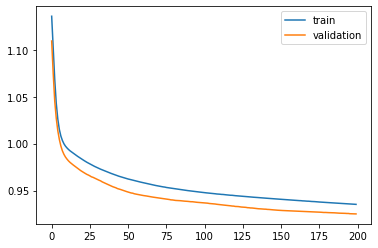

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

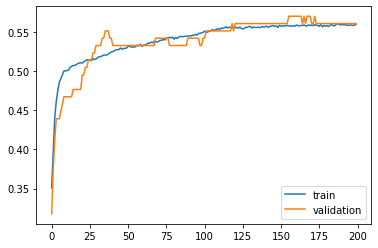

In [12]:
# plt.plot(history.history['acc'], label='train')
# plt.plot(history.history['val_acc'], label='validation')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [13]:
test_predictions = np.argmax(model.predict(X_test), axis=1)
accuracy = (test_predictions == y_test.values).sum() / y_test.values.shape[0]
print("Test set accuracy:", accuracy)

Test set accuracy: 0.5157894736842106


In [14]:
from sklearn.metrics import confusion_matrix
print("Y train")
print("Unique train labels:", np.unique(y_train.values))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Away win count:", (y_train==2).sum())

Y train
Unique train labels: [0 1 2]
Away win count: 738
Draw count: 621
Away win count: 1301


In [15]:
print("Train Prediction")
train_predictions = np.argmax(model.predict(X_train), axis=1)
print("Unique train labels:", np.unique(train_predictions))
print("Away win count:", (y_train==0).sum())
print("Draw count:", (y_train==1).sum())
print("Home win count:", (y_train==2).sum())

Train Prediction
Unique train labels: [0 1 2]
Away win count: 738
Draw count: 621
Home win count: 1301


In [16]:
# Train
df_conf_matrix = pd.DataFrame(confusion_matrix(y_train, train_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Train Data")
df_conf_matrix

Train Data


,pred home,pred draw,pred away
true home,320,7,411
true draw,147,17,457
true away,137,14,1150


In [17]:
# Test
df_conf_matrix = pd.DataFrame(confusion_matrix(y_test, test_predictions, labels=[0, 1, 2]), 
             index=['true home', 'true draw', 'true away'], columns=['pred home', 'pred draw', 'pred away'])
print("Test Data")
df_conf_matrix

Test Data


,pred home,pred draw,pred away
true home,38,2,73
true draw,20,1,62
true away,22,5,157
